                                                                
# <center> **Data-Driven Insights: Enhancing User Experience through Advanced Recommendation Systems**</center>  
### **A Deep Dive into Collaborative Filtering, Content Based Filtering, Rank-Based, Popularity-Based Methods, and Sentiment Analysis**

## **Author -** **Deepa Sarojam**

# <center> ![Capstone Header Image](https://imgur.com/U8CuIiT.gif)</center>

##**Executive Summary**
Recommender systems are algorithms designed to predict user preferences or recommend items to users. These systems have become ubiquitous in today's digital landscape, powering recommendations on platforms like Amazon, Netflix, and Spotify. My fascination with the transformative impact of these technologies on user engagement and satisfaction has inspired me to explore this topic for my Capstone project.

By exploring sentiment analysis on the data, I aimed to understand user preferences and reactions more deeply, although the implementation was focused solely on the recommendation system. This project seeks to enhance the user experience by delivering accurate recommendations based on collaborative and popularity-based filtering techniques.

## **Rationale**

Building a recommender system involves a combination of machine learning, data analysis, and software engineering skills. It requires understanding algorithms such as collaborative filtering, content-based filtering, matrix factorization, and more.
Recommender systems are widely used in various industries, including e-commerce, streaming services, social media platforms, and more. This is an on-demand application that delves deep into understanding user needs, preferences, and interactions with digital platforms, fostering a user-centric design approach in their product development process.

## **Research Question**

The question at hand is the optimization of recommender systems to improve user engagement and satisfaction on digital platforms. While recommender systems have become essential for enhancing user experiences by providing personalized recommendations, there remains a challenge in accurately predicting user preferences and reactions.

The problem revolves around refining recommendation algorithms to better understand and cater to individual user preferences within diverse content catalogs. The challenge lies in developing algorithms that can accurately predict user interests based on past behaviors, interactions, and preferences.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive # Mount to Google Drive to fetch the datasets
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Sources**

To construct a dataset suitable for exploring recommendation systems and sentiment analysis, I utilized **Python's Faker** library. It has **30, 000 records and and 25 columns**.

Drawing inspiration from publicly available datasets such as H&M data from Kaggle and the ShopperSentiments dataset, I synthesized a dataset containing relevant attributes like Transaction ID, Date, Product ID, Product Name, Product Description, Product Category, Sub Category, Color, Rating, Product Review, Quantity, Customer ID, Customer Name, Age, Price, Currency, Discounts, Sales Revenue, Payment Method, Store Type, Season, Latitude, Longitude, and Country. This rich dataset mirrors real-world transactional and review data, enabling comprehensive analysis and experimentation to enhance user experience through advanced recommendation systems and sentiment analysis.

**H&M dataset**- https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data


**ShopperSentiments dataset** - https://www.kaggle.com/datasets/nelgiriyewithana/shoppersentiments




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/data/retail_data.csv') # Read the dataset

In [ ]:
df = pd.DataFrame(df) # Convert the dataset into a dataframe

In [ ]:
df.head()  # Display the data

Transaction ID        Date  Product ID                Product Name  \
0            4201  2019-07-02      678602            Alana Lace Dress   
1              79  2020-09-18      572797  ESSENTIAL TANKTOP LACE TVP   
2            3871  2019-05-22      830508             ED Strap top 3p   
3           27673  2018-10-10      693242                        Bama   
4           28692  2019-04-24      819143           H2 Aster dress PI   

                                 Product Description  \
0  Lace dress with short cap sleeves and an openi...   
1  Fitted vest top in soft cotton jersey with lac...   
2  Fitted tops in soft, organic cotton jersey wit...   
3  Wide jumper in a soft, fine knit containing so...   
4  Long dress in patterned chiffon crêpe with smo...   

             Product Category          Sub Category            Color  Rating  \
0                   Kids Girl  Dresses/Skirts girls              Red       5   
1               Womens Casual          Jersey Fancy            White       4   
2                        H&M+          Jersey Fancy            Black       5   
3  Womens Everyday Collection              Knitwear            Green       5   
4  Womens Everyday Collection        Special Offers  Yellowish Brown       5   

                                      Product Review  Number of Reviews  \
0  The items I purchased we enthusiastically rece...                 78   
1  The artist gets 5 stars, love the design.Shirt...                  0   
2  Very much appreciate the variety of tees that ...                 41   
3  Good work, nice quality tees ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...                  0   
4  Fun, cool Randy Rainbow t-shirt!Thank you for ...                 44   

   Quantity  Customer ID   Customer Name   Age     Price Currency  Discounts  \
0         2       230653      Jared Hall  38.0  0.016932       US      False   
1         4       854311  Andrea Estrada  48.0  0.010153       US       True   
2         1       149431  Michael Butler  50.0  0.025407       US       True   
3         3       346454     Ryan Thomas  25.0  0.015237       US      False   
4         3       409920  Katelyn Harris  45.0  0.020322       US      False   

   Sales Revenue  Payment Method             Store Type  Season  Latitude  \
0       0.027092            Cash  independent boutiques  Autumn  37.09024   
1       0.032488            Cash  independent boutiques  Spring  37.09024   
2       0.020325     Credit Card  independent boutiques  Autumn  37.09024   
3       0.036569  Mobile Payment          luxury brands  Spring  37.09024   
4       0.048773     Credit Card          luxury brands  Summer  37.09024   

   Longitude Country  
0 -95.712891      US  
1 -95.712891      US  
2 -95.712891      US  
3 -95.712891      US  
4 -95.712891      US

In [ ]:
df.info() # Display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction ID       30000 non-null  int64  
 1   Date                 30000 non-null  object 
 2   Product ID           30000 non-null  int64  
 3   Product Name         30000 non-null  object 
 4   Product Description  29929 non-null  object 
 5   Product Category     30000 non-null  object 
 6   Sub Category         30000 non-null  object 
 7   Color                30000 non-null  object 
 8   Rating               30000 non-null  int64  
 9   Product Review       26708 non-null  object 
 10  Number of Reviews    30000 non-null  int64  
 11  Quantity             30000 non-null  int64  
 12  Customer ID          30000 non-null  int64  
 13  Customer Name        30000 non-null  object 
 14  Age                  29881 non-null  float64
 15  Price                30000 non-null 

There are 25 columns in the dataset.

* **Transaction ID**: Unique identifier for each transaction.
* **Dat**e: Date of the transaction.
* **Product ID**: Unique identifier for each product.
* **Product Name**: Name of the product.
* **Product Description**: Description of the product (some missing values).
* **Product Category**: Category of the product.
* **Sub Category**: Sub-category of the product.
* **Color**: Color of the product.
* **Rating**: Rating given by customers for the product.
* **Product Review**: Review provided by customers for the product (some missing values).
* **Number of Reviews**: Total number of reviews for the product.
* **Quantity**: Quantity of the product purchased in the transaction.
* **Customer ID**: Unique identifier for each customer.
* **Customer Name**: Name of the customer.
* **Age**: Age of the customer (some missing values).
* **Price**: Price of the product.
* **Currency**: Currency used for the transaction.
* **Discounts**: Boolean indicating whether any discounts were applied.
* **Sales Revenue**: Revenue generated from the transaction.
* **Payment Method**: Method used for payment.
* **Store Type**: Type of store where the transaction occurred.
* **Season**: Season in which the transaction occurred.
* **Latitude**: Latitude of the transaction location.
* **Longitude**: Longitude of the transaction location.
* **Country**: Country where the transaction occurred.




In [ ]:
df.describe().T # Display the descriptive statistics of the dataset

count           mean            std            min  \
Transaction ID     30000.0   15037.983267    8697.529204       1.000000   
Product ID         30000.0  698170.604000  133102.817040  108775.000000   
Rating             30000.0       4.417700       1.174311       1.000000   
Number of Reviews  30000.0      49.599833      28.874481       0.000000   
Quantity           30000.0       2.496100       1.119744       1.000000   
Customer ID        30000.0  549981.844933  260441.029438  100016.000000   
Age                29881.0      36.228373      13.103199      16.000000   
Price              30000.0       0.028647       0.019723       0.000559   
Sales Revenue      30000.0       0.057186       0.050297       0.000447   
Latitude           30000.0      37.246332       9.989669     -40.900557   
Longitude          30000.0     -88.493948      36.107164    -159.777671   

                             25%            50%            75%            max  
Transaction ID       7507.250000   15054.000000   22574.750000   29999.000000  
Product ID         635838.750000  715606.000000  787095.000000  946764.000000  
Rating                  5.000000       5.000000       5.000000       5.000000  
Number of Reviews      24.000000      50.000000      75.000000      99.000000  
Quantity                1.000000       2.000000       3.000000       4.000000  
Customer ID        324000.500000  549380.500000  775737.500000  999989.000000  
Age                    25.000000      32.000000      48.000000      90.000000  
Price                   0.016559       0.025407       0.033881       0.337288  
Sales Revenue           0.024380       0.040664       0.081302       0.809492  
Latitude               37.090240      37.090240      37.090240      64.963051  
Longitude             -95.712891     -95.712891     -95.712891     174.885971

**Descriptive statistics** provide a comprehensive summary of a dataset's main characteristics through numerical calculations, graphs, and tables. They help to understand the basic features of the data, such as its central tendency (mean, median, mode), variability (range, variance, standard deviation), and distribution (frequency, skewness, kurtosis). Descriptive statistics simplify large amounts of data in a sensible way, making it easier to comprehend and interpret the underlying patterns and trends. This foundational analysis is crucial for informing more complex statistical procedures, hypothesis testing, and decision-making processes by providing a clear and concise overview of the data's general behavior and key attributes.

Let's explore the data more with a histplot.

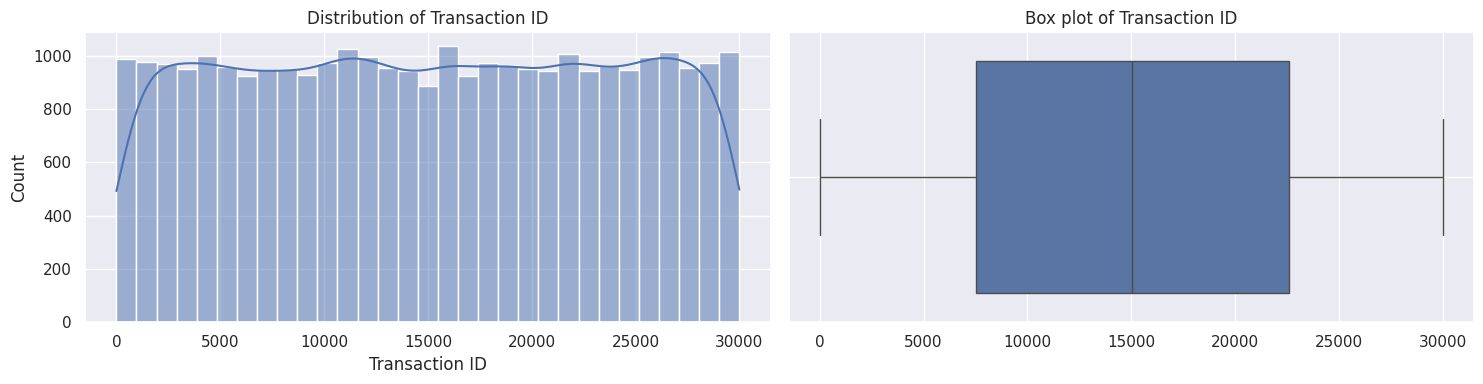

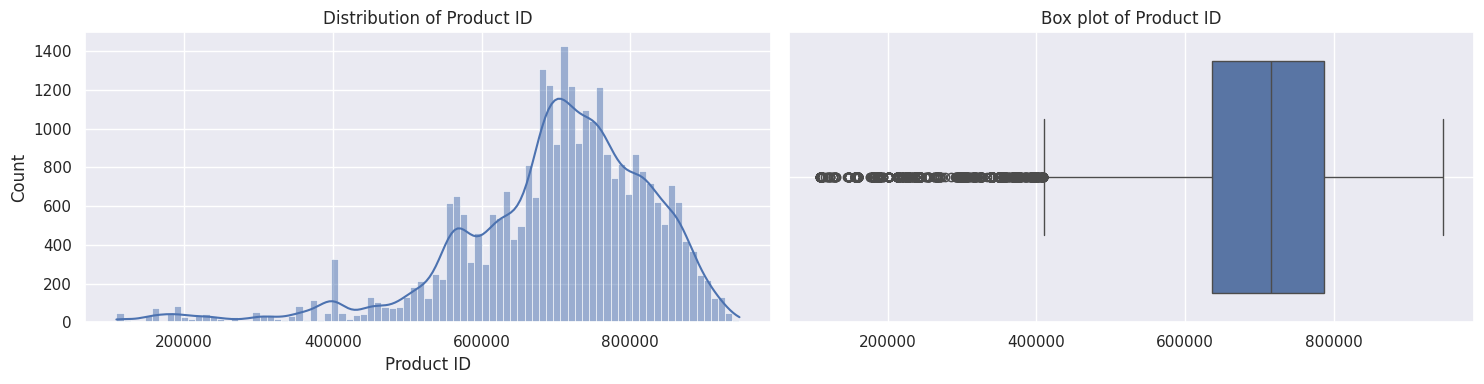

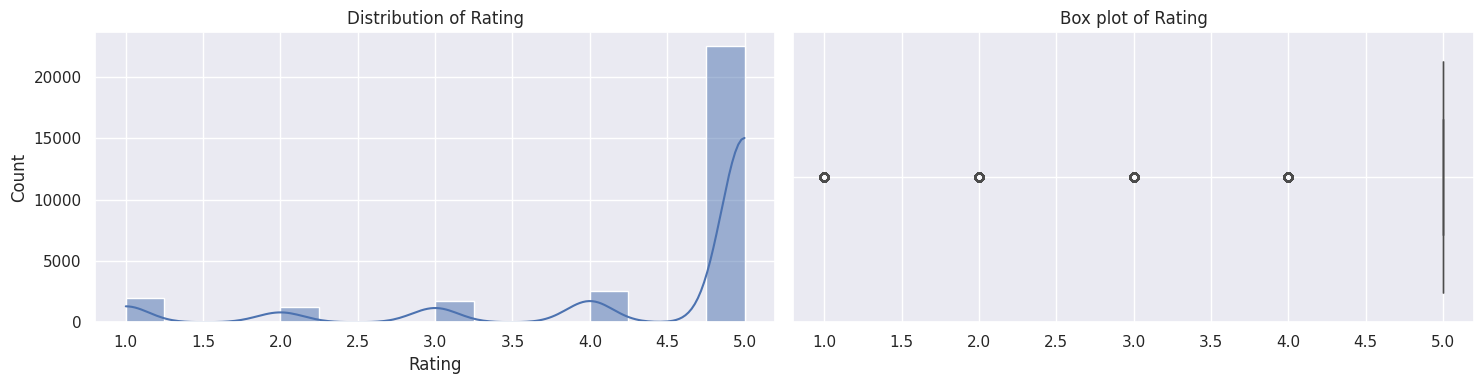

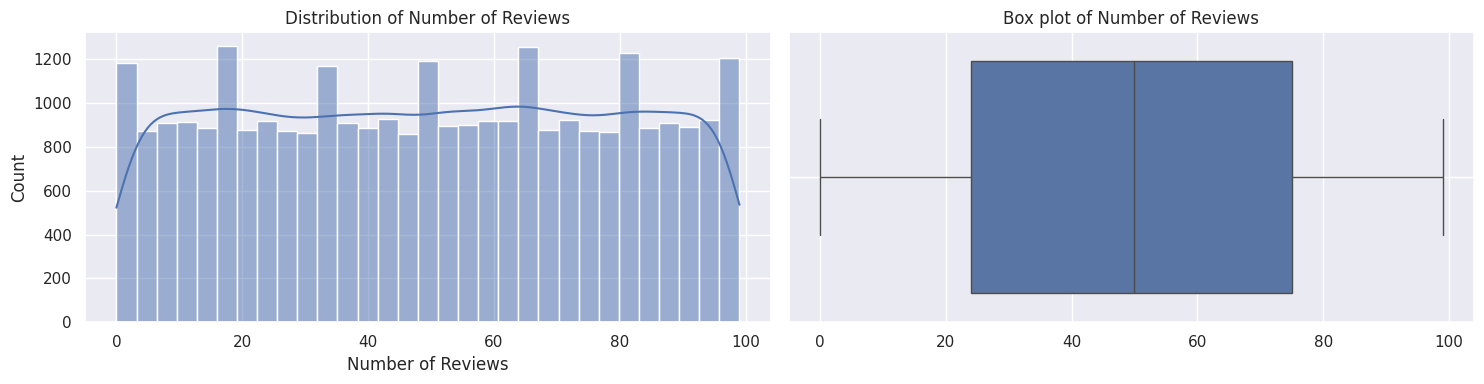

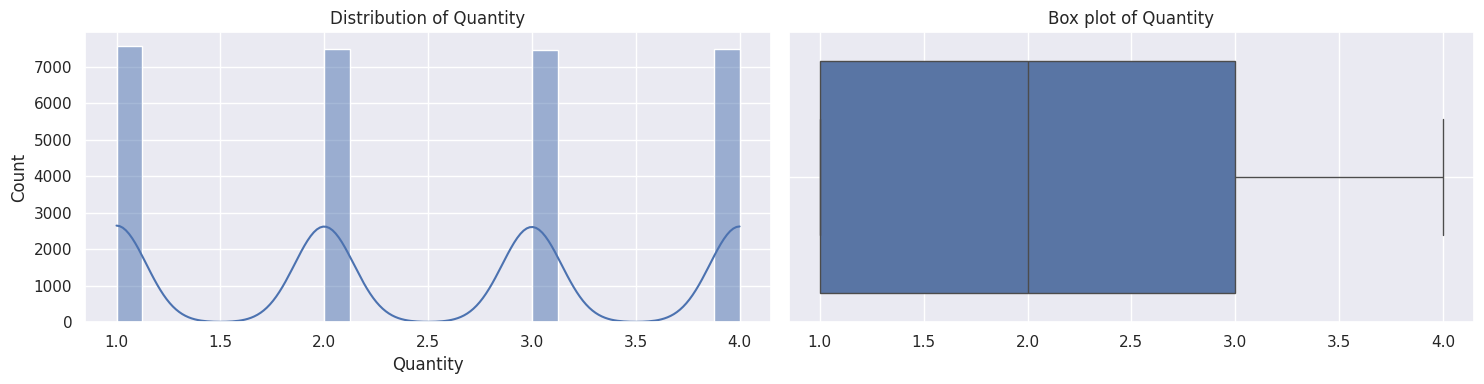

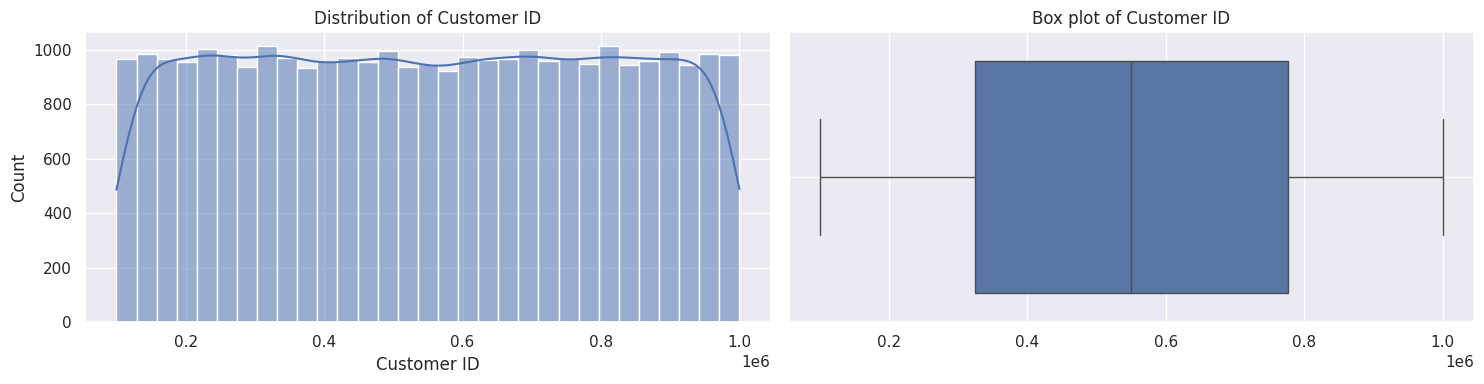

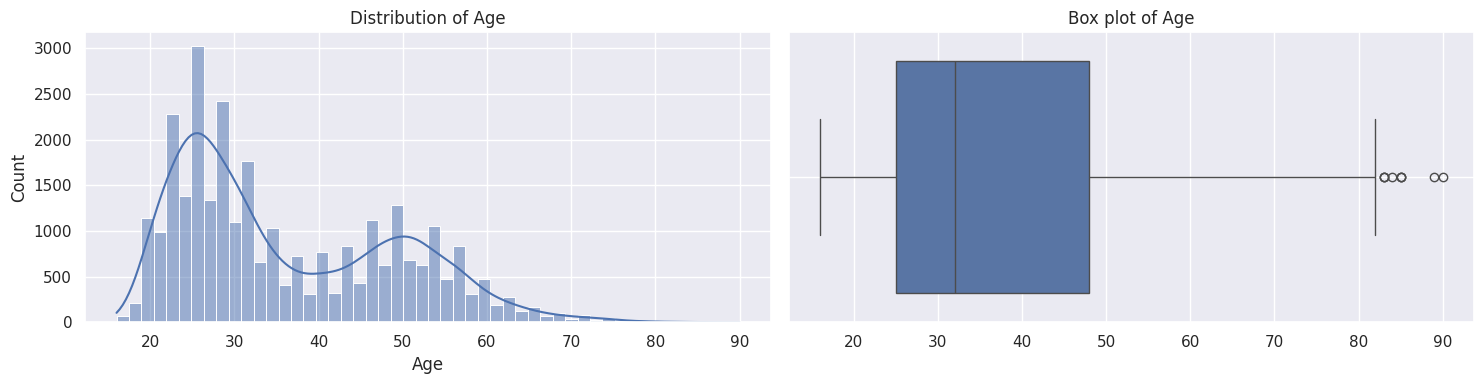

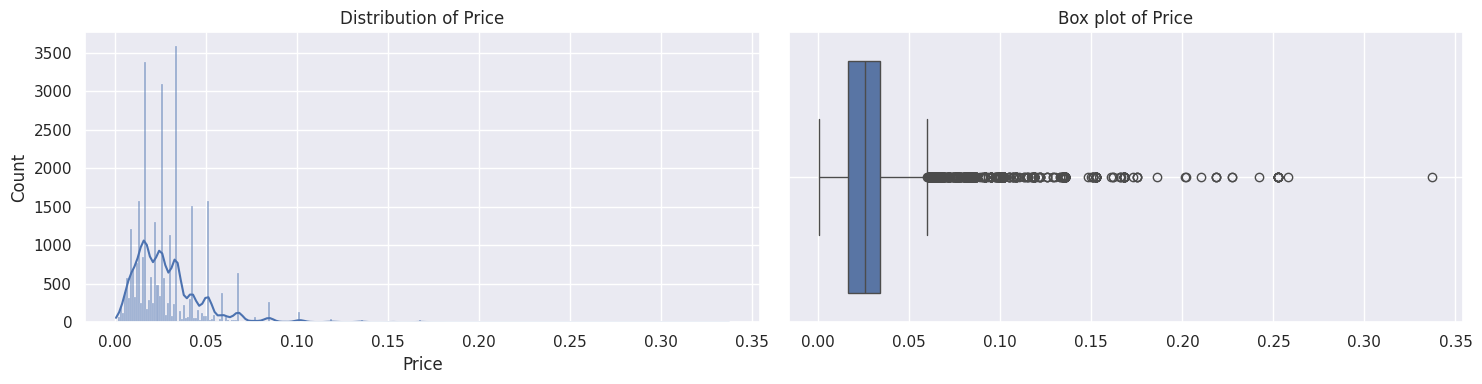

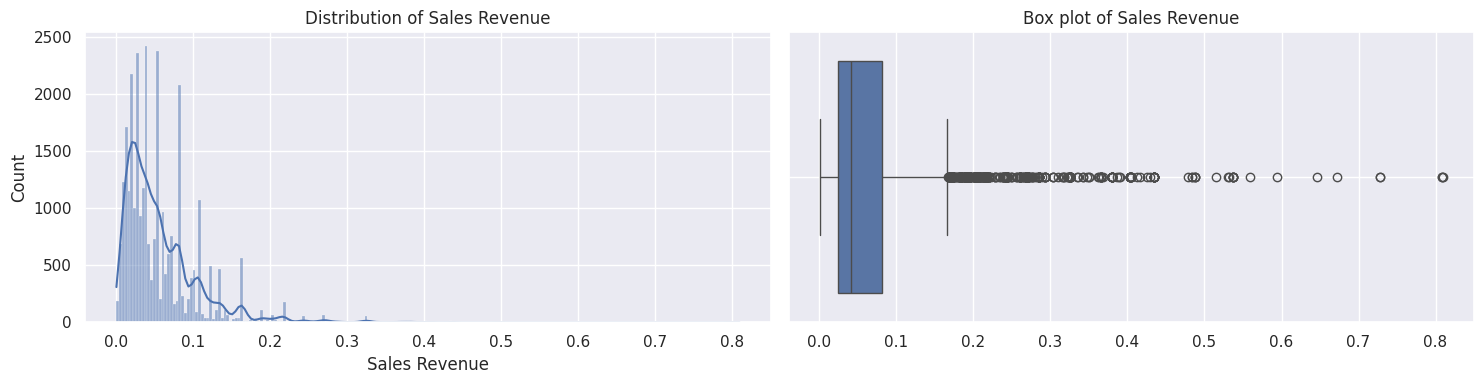

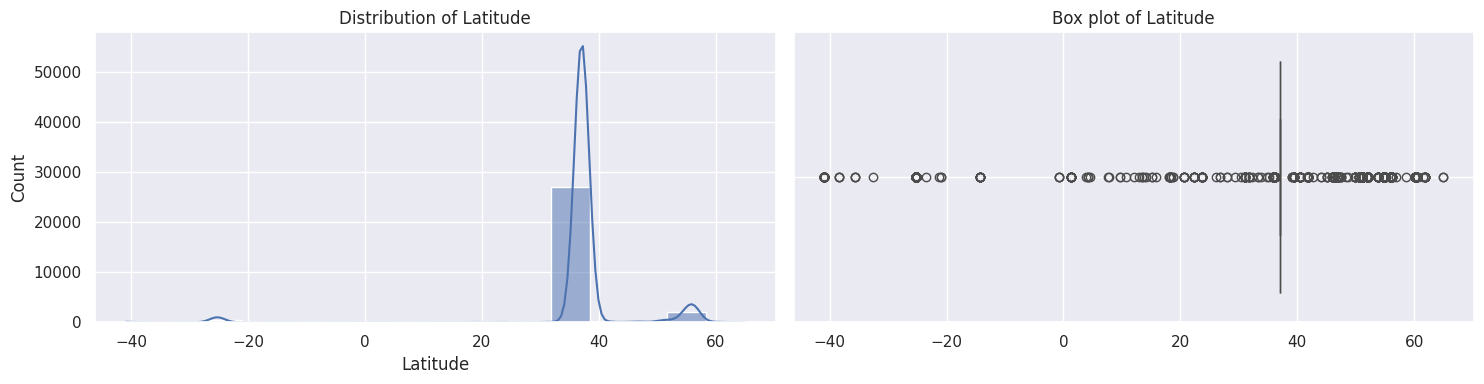

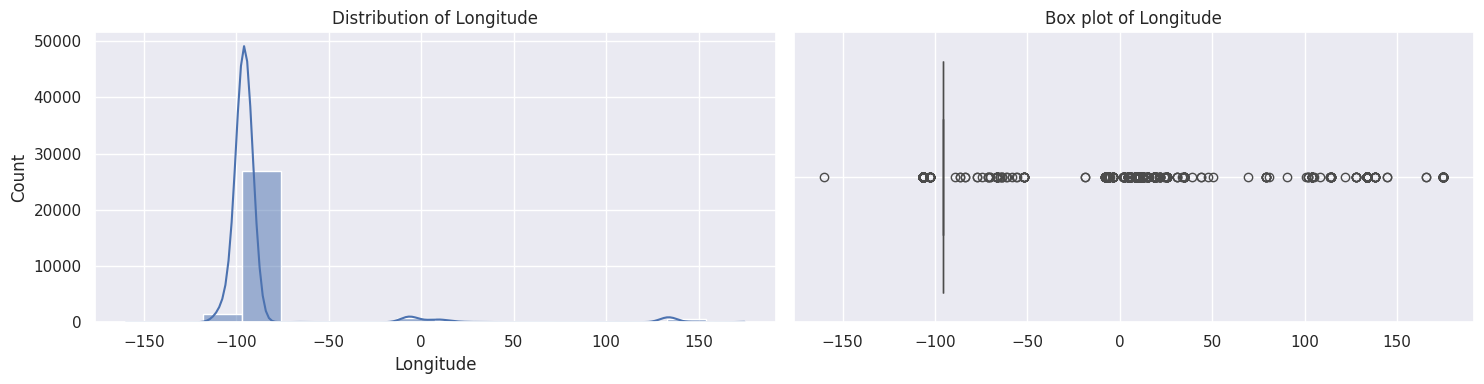

In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

#Distribution of Numeric-columns
for i in numeric_df:
    fig,axes=plt.subplots(1,2,figsize=(15,4))

    sns.histplot(df[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()


From the summary statistics and histplot, we can draw several findings:

**Transaction ID**: The transaction IDs range from 1 to 30,000 in the dataset.

**Rating**: The ratings have a mean of approximately 4.42, with most ratings clustered around 5. This indicates that the majority of products are highly rated by customers.

**Number of Reviews**: The average number of reviews per product is around 49.6, with a standard deviation of approximately 28.87. This suggests variability in the popularity and engagement levels of different products.

**Quantity**: The average quantity of products purchased per transaction is approximately 2.50, with a standard deviation of about 1.12. This indicates that, on average, customers tend to purchase a moderate number of items per transaction.

**Age**: The average age of customers is around 36.23 years, with a standard deviation of about 13.10. This indicates variability in the age distribution of customers.

**Price**: The average price of products is very low, approximately 0.03. This suggests that the dataset may contain prices in a different scale or units compared to typical retail datasets.

**Sales Revenue**: The average sales revenue per transaction is approximately 0.06. Similar to price, this value seems low, possibly due to differences in currency or units.

**Latitude and Longitude**: The latitude and longitude values indicate the geographic locations of transactions. The mean latitude is approximately 37.25, and the mean longitude is approximately -88.49.




In [ ]:
# Descriptive Stats for non numerical fields
df.describe(include=object)

Date              Product Name  \
count        30000                     30000   
unique         734                     10199   
top     2019-09-28  Jade HW Skinny Denim TRS   
freq           192                       190   

                                      Product Description  \
count                                               29929   
unique                                               9726   
top     High-waisted jeans in washed superstretch deni...   
freq                                                  247   

                  Product Category  Sub Category  Color  \
count                        30000         30000  30000   
unique                          56            21     49   
top     Womens Everyday Collection  Jersey Fancy  Black   
freq                          6036          5039  10222   

                                           Product Review  Customer Name  \
count                                               26708          30000   
unique                                              25363          25781   
top     I had accidentally used an old address and it ...  Michael Smith   
freq                                                    3             14   

       Currency  Payment Method         Store Type  Season Country  
count     30000           30000              30000   30000   30000  
unique       84               4                  4       4      84  
top          US  Mobile Payment  department stores  Spring      US  
freq      26947            7614               7626    7543   26947

From the summary statistics provided for categorical variables, we can draw several findings:

**Date:**

There are 30,000 unique dates in the dataset.
The most frequent date is '2019-09-28', occurring 192 times.

**Product Name:**

There are 10,199 unique product names.
The most frequent product name is 'Jade HW Skinny Denim TRS', occurring 190 times.

**Product Description:**

There are 9,726 unique product descriptions.
The most frequent product description is for 'High-waisted jeans in washed superstretch denim'.

**Product Category:**

There are 56 unique product categories.
The most frequent product category is 'Womens Everyday Collection', occurring 6,036 times.

**Sub Category:**

There are 21 unique sub-categories.
The most frequent sub-category is 'Jersey Fancy', occurring 5,039 times.

**Color:**

There are 49 unique colors.
The most frequent color is 'Black', occurring 10,222 times.

**Product Review:**

There are 25,363 unique product reviews.
The most frequent review is "I had accidentally used an old address and it..." occurring 3 times.

**Customer Name:**

There are 25,781 unique customer names.
The most frequent customer name is 'Michael Smith', occurring 14 times.

**Currency:**

There are 84 unique currencies used in transactions.

**Payment Method:**

There are 4 unique payment methods.
The most frequent payment method is 'Mobile Payment', occurring 26,947 times.

**Store Type:**
There are 4 unique store types.
The most frequent store type is 'department stores', occurring 7,614 times.

**Season:**
There are 4 unique seasons.
The most frequent season is 'Spring', occurring 7,543 times.

**Country:**
There are 84 unique countries where transactions occurred.

## **Feature Engineering**

Feature engineering is the process of transforming raw data into a format that is suitable for machine learning algorithms. It involves creating new features or modifying existing ones to improve the performance of a predictive model.

#### *“Data is like garbage. You’d better know what you are going to do with it before you collect it.” ~ Mark Twain*



We got some insights about the data from statistical analysis, let's dig deep to understand the data.

In [ ]:
print(f"Number of transactions in the dataset: {df['Transaction ID'].nunique()}") # How many unique transactions are there?

Number of transactions in the dataset: 18971


Since, `Transaction ID` is the unique column in this dataset, we need to make sure that we the dataset do not contain any row with null values in this field.

In [ ]:
df['Transaction ID'] = df['Transaction ID'].dropna() # Drop NAs
df['Transaction ID'].nunique()

18971

There are '18971' unique transactions in the dataset.


In [ ]:
from datetime import datetime

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, day, time, month, weekday, week of the year, quarter, day of week and time of day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()
df['Week of Year'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter
df['Day of Week'] = df['Date'].dt.dayofweek
df['Time of Day'] = pd.cut(df['Date'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [ ]:
df['Product ID'].nunique() # How many unique products are there?

10161

There are `10161` unique products in the dataset.

In [ ]:
print(df['Product Category'].unique()) # What are the unique product categories?
print(f"\n Number of unique product categories: {df['Product Category'].nunique()}")

['Kids Girl' 'Womens Casual' 'H&M+' 'Womens Everyday Collection'
 'Womens Jackets' 'Ladies H&M Sport' 'Womens Swimwear, beachwear'
 'Men Underwear' 'Ladies Denim' 'Mama' 'Womens Big accessories'
 'Divided Collection' 'Womens Trend' 'Contemporary Smart' 'Divided Basics'
 'Womens Tailoring' 'Womens Nightwear, Socks & Tigh'
 'Womens Everyday Basics' 'Girls Underwear & Basics' 'Mens Outerwear'
 'Men Shoes' 'Kids & Baby Shoes' 'Young Boy' 'Divided Selected'
 'Womens Small accessories' 'Contemporary Casual' 'Divided Accessories'
 'Womens Shoes' 'Collaborations' 'Divided Projects' 'Womens Premium'
 'Young Girl' 'Contemporary Street' 'Baby Essentials & Complements'
 'Men Accessories' 'Womens Lingerie' 'Special Collections' 'Denim Men'
 'Kids Boy' 'Divided Asia keys' 'Men Suits & Tailoring' 'Kids Sports'
 'Kids Accessories, Swimwear & D' 'Men H&M Sport' 'Baby Girl'
 'Boys Underwear & Basics' 'Kids Outerwear' 'Divided Complements Other'
 'Baby Boy' 'Men Project' 'Men Other 2' 'Men Edition'
 'Kid

In [ ]:
product_cat_unq = df['Product Category'].value_counts() # How many purchases were made in each product category?
print(f"\nNumber of purchases made in each product category: {product_cat_unq[product_cat_unq.apply(lambda x: x > 500)]}")


Number of purchases made in each product category: Product Category
Womens Everyday Collection        6036
Divided Collection                3873
Womens Swimwear, beachwear        2536
Womens Tailoring                  2189
Womens Everyday Basics            1560
Divided Basics                    1285
Womens Casual                     1228
Womens Nightwear, Socks & Tigh    1084
Ladies Denim                      1078
Ladies H&M Sport                  1004
Womens Small accessories           686
Womens Shoes                       664
Men Underwear                      625
Womens Trend                       593
H&M+                               553
Name: count, dtype: int64


In [ ]:
print(f"Maximum Price : $ {df['Price'].max()}") # What is the maximum price in the dataset?
print(f"Minimum Price : $ {df['Price'].min()}") # What is the minimum price in the dataset?

Maximum Price : $ 0.3372881355932203
Minimum Price : $ 0.0005593220338983


Since, this is a global dataset, it is important to know the countries we have the data in our dataset.

In [ ]:
print(f"The currency values with which purchases were made: {df['Currency'].unique()}") # Let's check the different currency values
print(f"\nNumber of unique currencies: {df['Currency'].nunique()}") # How many unique currencies are there?
print(f"\nNumber of purchases made in each currency: {df['Currency'].value_counts()}") # How many purchases were made in each currency?

The currency values with which purchases were made: ['US' 'CA' 'GB' 'NL' 'IT' 'DE' 'AU' 'FR' 'MX' 'IL' 'SG' 'CH' 'NZ' 'LT'
 'MY' 'JP' 'PL' 'PR' 'CI' 'MT' 'PT' 'TH' 'NO' 'EG' 'AR' 'BE' 'CZ' 'FI'
 'SE' 'IE' 'BG' 'CR' 'BH' 'ES' 'KR' 'IN' 'BM' 'ID' 'MN' 'RS' 'DK' 'PH'
 'MA' 'HK' 'GU' 'CL' 'DZ' 'IQ' 'PY' 'HN' 'DO' 'BR' 'JM' 'HU' 'SV' 'CK'
 'VI' 'UY' 'IS' 'SK' 'CY' 'LK' 'CO' 'LU' 'AT' 'RO' 'MK' 'SY' 'TN' 'HR'
 'NC' 'VN' 'GR' 'PK' 'TW' 'LV' 'GD' 'SR' 'KW' 'RU' 'TT' 'BD' 'EE' 'UA']

Number of unique currencies: 84

Number of purchases made in each currency: Currency
US    26947
CA     1408
GB      500
AU      480
DE      122
NL       71
FR       43
NZ       40
IT       38
IL       25
MX       22
BE       20
PR       20
ES       17
IE       16
SE       14
NO       13
SG       13
CH       12
BR       10
PL       10
DK       10
JP       10
PT        9
HK        8
FI        8
IN        6
KR        6
CZ        6
HU        5
MA        5
RO        4
HR        4
AT        3
AR        3
ID        3
GR 

The dataset contains transactions made in various currencies, with a total of 84 unique currencies recorded. The majority of purchases were made in US dollars (USD), comprising 26,947 transactions. Other currencies with notable transaction counts include Canadian dollars (CAD) with 1,408 transactions, British pounds (GBP) with 500 transactions, and Australian dollars (AUD) with 480 transactions.

However, a significant portion of currencies have lower transaction counts, indicating a diverse international customer base. Some currencies, such as Russian rubles (RUB), Ukrainian hryvnias (UAH), and Thai baht (THB), have only one recorded transaction each.

In [ ]:
print(f"The payment methods used by customers: {df['Payment Method'].unique()}") # What are the payment methods used by customers?
print(f"\nPurhcases made from each payment method: {df['Payment Method'].value_counts()}") # How many purchases were made from each payment method?

The payment methods used by customers: ['Cash' 'Credit Card' 'Mobile Payment' 'PayPal']

Purhcases made from each payment method: Payment Method
Mobile Payment    7614
Cash              7523
PayPal            7452
Credit Card       7411
Name: count, dtype: int64


The dataset comprises purchases made using four distinct payment methods: Cash, Credit Card, Mobile Payment, and PayPal. The distribution of purchases across these payment methods is relatively balanced. Mobile Payment stands out as the most frequently used method, with 7,614 transactions recorded. Following closely are Cash and PayPal, with 7,523 and 7,452 transactions, respectively. Credit Card transactions are slightly lower but still substantial, totaling 7,411 purchases.

In [ ]:
print(f"The customer categories includes: {df['Product Category'].unique()}") # What are the customer categories?
print(f"\nPurhcases made from each customer category:\n{df['Product Category'].value_counts()}") # How many purchases were made from each customer category?

The customer categories includes: ['Kids Girl' 'Womens Casual' 'H&M+' 'Womens Everyday Collection'
 'Womens Jackets' 'Ladies H&M Sport' 'Womens Swimwear, beachwear'
 'Men Underwear' 'Ladies Denim' 'Mama' 'Womens Big accessories'
 'Divided Collection' 'Womens Trend' 'Contemporary Smart' 'Divided Basics'
 'Womens Tailoring' 'Womens Nightwear, Socks & Tigh'
 'Womens Everyday Basics' 'Girls Underwear & Basics' 'Mens Outerwear'
 'Men Shoes' 'Kids & Baby Shoes' 'Young Boy' 'Divided Selected'
 'Womens Small accessories' 'Contemporary Casual' 'Divided Accessories'
 'Womens Shoes' 'Collaborations' 'Divided Projects' 'Womens Premium'
 'Young Girl' 'Contemporary Street' 'Baby Essentials & Complements'
 'Men Accessories' 'Womens Lingerie' 'Special Collections' 'Denim Men'
 'Kids Boy' 'Divided Asia keys' 'Men Suits & Tailoring' 'Kids Sports'
 'Kids Accessories, Swimwear & D' 'Men H&M Sport' 'Baby Girl'
 'Boys Underwear & Basics' 'Kids Outerwear' 'Divided Complements Other'
 'Baby Boy' 'Men Project'

* The most purchased customer category is 'Womens Everyday Collection', with 6,036 transactions recorded.
* Following closely is 'Divided Collection' with 3,873 transactions, indicating a strong demand for this category as well.
* 'Womens Swimwear, beachwear' and 'Womens Tailoring' are also popular categories, with 2,536 and 2,189 transactions respectively.
* Categories like Womens Everyday Basics (1,560), Divided Basics (1,285), and Womens Casual (1,228) have significant, but lower, purchase volumes.
* Other notable categories include Womens Nightwear, Socks & Tigh (1,084), Ladies Denim (1,078), and Ladies H&M Sport (1,004).
* Categories such as Womens Small accessories (686), Womens Shoes (664), and Men Underwear (625) have moderate purchase volumes.
* Categories like Womens Trend (593), H&M+ (553), and Womens Big accessories (479) show lower but still significant purchase activity.
* Several categories have very few transactions, such as Men Other (2), EQ Divided (1), and Ladies Other (1).
* Other low-volume categories include Men Edition (6), Men Project (9), and Kids Local Relevance (12).

The high purchase volumes in certain categories suggest strong customer demand and potential areas for focused marketing and inventory planning.
Lower volume categories might represent niche markets or areas for potential growth and targeted promotions.

In [ ]:
print(f"The store types includes: {df['Store Type'].unique()}") # What are the store types?
print(f"\nPurhcases made from each store type: {df['Store Type'].value_counts()}") # How many purchases were made from each store type?

The store types includes: ['independent boutiques' 'luxury brands' 'high street chain stores'
 'department stores']

Purhcases made from each store type: Store Type
department stores           7626
luxury brands               7538
independent boutiques       7438
high street chain stores    7398
Name: count, dtype: int64


* Department stores have the highest number of purchases, with 7,626 transactions recorded.
* Luxury brands and independent boutiques follow closely behind, with 7,538 and 7,438 transactions respectively.
* High street chain stores also demonstrate substantial transaction volumes, with 7,398 purchases.

In [ ]:
print(f"The seasons are: {df['Season'].unique()}") # What are the seasons?
print(f"\nPurhcases made from each season: {df['Season'].value_counts()}")  # How many purchases were made from each season?

The seasons are: ['Autumn' 'Spring' 'Summer' 'Winter']

Purhcases made from each season: Season
Spring    7543
Autumn    7538
Winter    7460
Summer    7459
Name: count, dtype: int64


* Spring has the highest number of purchases, with 7,543 transactions.
* Autumn closely follows with 7,538 transactions.
* Winter and Summer have slightly fewer transactions, with 7,460 and 7,459 purchases respectively.

Understanding seasonal purchase patterns can help businesses tailor their marketing strategies, inventory management, and promotional efforts to align with customer demand during different times of the year.

In [ ]:
# Dictionary mapping abbreviations to full names
country_mapping = {
    'US': 'United States',
    'CA': 'Canada',
    'PT': 'Portugal',
    'LU': 'Luxembourg',
    'GB': 'United Kingdom',
    'NZ': 'New Zealand',
    'PR': 'Puerto Rico',
    'JP': 'Japan',
    'AU': 'Australia',
    'FI': 'Finland',
    'SE': 'Sweden',
    'FR': 'France',
    'SG': 'Singapore',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'CZ': 'Czech Republic',
    'PH': 'Philippines',
    'DE': 'Germany',
    'HU': 'Hungary',
    'HK': 'Hong Kong',
    'IT': 'Italy'
}

# Replace abbreviations with full names
df['Country'] = df['Country'].map(country_mapping) # Replace abbreviations with full names

df.head()

Transaction ID       Date  Product ID                Product Name  \
0            4201 2019-07-02      678602            Alana Lace Dress   
1              79 2020-09-18      572797  ESSENTIAL TANKTOP LACE TVP   
2            3871 2019-05-22      830508             ED Strap top 3p   
3           27673 2018-10-10      693242                        Bama   
4           28692 2019-04-24      819143           H2 Aster dress PI   

                                 Product Description  \
0  Lace dress with short cap sleeves and an openi...   
1  Fitted vest top in soft cotton jersey with lac...   
2  Fitted tops in soft, organic cotton jersey wit...   
3  Wide jumper in a soft, fine knit containing so...   
4  Long dress in patterned chiffon crêpe with smo...   

             Product Category          Sub Category            Color  Rating  \
0                   Kids Girl  Dresses/Skirts girls              Red       5   
1               Womens Casual          Jersey Fancy            White       4   
2                        H&M+          Jersey Fancy            Black       5   
3  Womens Everyday Collection              Knitwear            Green       5   
4  Womens Everyday Collection        Special Offers  Yellowish Brown       5   

                                      Product Review  Number of Reviews  \
0  The items I purchased we enthusiastically rece...                 78   
1  The artist gets 5 stars, love the design.Shirt...                  0   
2  Very much appreciate the variety of tees that ...                 41   
3  Good work, nice quality tees ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...                  0   
4  Fun, cool Randy Rainbow t-shirt!Thank you for ...                 44   

   Quantity  Customer ID   Customer Name   Age     Price Currency  Discounts  \
0         2       230653      Jared Hall  38.0  0.016932       US      False   
1         4       854311  Andrea Estrada  48.0  0.010153       US       True   
2         1       149431  Michael Butler  50.0  0.025407       US       True   
3         3       346454     Ryan Thomas  25.0  0.015237       US      False   
4         3       409920  Katelyn Harris  45.0  0.020322       US      False   

   Sales Revenue  Payment Method             Store Type  Season  Latitude  \
0       0.027092            Cash  independent boutiques  Autumn  37.09024   
1       0.032488            Cash  independent boutiques  Spring  37.09024   
2       0.020325     Credit Card  independent boutiques  Autumn  37.09024   
3       0.036569  Mobile Payment          luxury brands  Spring  37.09024   
4       0.048773     Credit Card          luxury brands  Summer  37.09024   

   Longitude        Country  Year  Month  Day    WeekDay  Week of Year  \
0 -95.712891  United States  2019      7    2    Tuesday            27   
1 -95.712891  United States  2020      9   18     Friday            38   
2 -95.712891  United States  2019      5   22  Wednesday            21   
3 -95.712891  United States  2018     10   10  Wednesday            41   
4 -95.712891  United States  2019      4   24  Wednesday            17   

   Quarter  Day of Week Time of Day  
0        3            1         NaN  
1        3            4         NaN  
2        2            2         NaN  
3        4            2         NaN  
4        2            2         NaN

In [ ]:
print(f"The countries are: {df['Country'].unique()}") # What are the countries?
print(f"\nPurhcases made from each country: {df['Country'].value_counts()}") # How many purchases were made from each country?

The countries are: ['United States' 'Canada' 'United Kingdom' 'Netherlands' 'Italy' 'Germany'
 'Australia' 'France' nan 'Singapore' 'Switzerland' 'New Zealand' 'Japan'
 'Poland' 'Puerto Rico' 'Portugal' 'Czech Republic' 'Finland' 'Sweden'
 'Philippines' 'Hong Kong' 'Chile' 'Hungary' 'Luxembourg']

Purhcases made from each country: Country
United States     26947
Canada             1408
United Kingdom      500
Australia           480
Germany             122
Netherlands          71
France               43
New Zealand          40
Italy                38
Puerto Rico          20
Sweden               14
Singapore            13
Switzerland          12
Japan                10
Poland               10
Portugal              9
Finland               8
Hong Kong             8
Czech Republic        6
Hungary               5
Chile                 3
Luxembourg            2
Philippines           1
Name: count, dtype: int64


* United States leads with 26,947 transactions, accounting for the vast majority of purchases.
* Canada is the second-highest, with 1,408 transactions.
* United Kingdom (500) and Australia (480) follow but have significantly fewer purchases compared to the United States.
* Germany (122) and Netherlands (71) show moderate levels of transactions.
* A few countries show very minimal transactions, including Portugal (9), Hong Kong (8), and Finland (8).
* Czech Republic (6), Hungary (5), and Chile (3) are at the lower end of the spectrum.
* Countries like Singapore (13), Switzerland (12), Japan (10), and Poland (10) also have low purchase numbers.
* Luxembourg (2) and Philippines (1) have the fewest transactions.

In [ ]:
print(f"Shopping Date range: {df['Date'].min()} through {df['Date'].max()}") # What is the shopping date range?

Shopping Date range: 2018-09-20 00:00:00 through 2020-09-22 00:00:00


In [ ]:
print(f"Purchases per day: {df['WeekDay'].value_counts()}") # How many purchases were made on each day of the week?

Purchases per day: WeekDay
Saturday     4755
Wednesday    4602
Thursday     4576
Friday       4546
Monday       3937
Tuesday      3864
Sunday       3720
Name: count, dtype: int64


* Saturday has the highest number of transactions, with 4,755 purchases, indicating it is the busiest shopping day.
* Wednesday (4,602) and Thursday (4,576) also show high transaction volumes, making midweek days significant for sales.
* Friday follows closely with 4,546 transactions, indicating consistent shopping activity towards the end of the week.
* Monday (3,937) and Tuesday (3,864) have moderate purchase volumes, showing steady customer activity at the beginning of the week.
* Sunday has the lowest number of transactions, with 3,720 purchases, but it still represents a significant share of the weekly transactions.

In [ ]:
df.duplicated().sum() # Are there any duplicates?

0

There are no duplicate data.

In [ ]:
columns_with_null = df.columns[df.isnull().any()].tolist() # Which columns have null values?
print(f"Columns with null values: {columns_with_null}")

Columns with null values: ['Product Description', 'Product Review', 'Age', 'Country', 'Time of Day']


## **Exploratory Data Analysis**

#### <center> ![EDA Image](https://imgur.com/ec3gOem.png)

**Exploratory Data Analysis (EDA)** is a critical step in understanding the dataset, identifying patterns, detecting anomalies, and extracting actionable insights. EDA is done using statistical graphics and other data visualization methods to summarize the main characteristics of a dataset.  

Before we ask questions about the reviews, it would help to understand the customer's demographics, i.e., country, category, etc. It's essential to explore these variables to understand how representative the reviews is of the product.

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [ ]:
# Importing libraries for data visialization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.head()

Transaction ID       Date  Product ID                Product Name  \
0            4201 2019-07-02      678602            Alana Lace Dress   
1              79 2020-09-18      572797  ESSENTIAL TANKTOP LACE TVP   
2            3871 2019-05-22      830508             ED Strap top 3p   
3           27673 2018-10-10      693242                        Bama   
4           28692 2019-04-24      819143           H2 Aster dress PI   

                                 Product Description  \
0  Lace dress with short cap sleeves and an openi...   
1  Fitted vest top in soft cotton jersey with lac...   
2  Fitted tops in soft, organic cotton jersey wit...   
3  Wide jumper in a soft, fine knit containing so...   
4  Long dress in patterned chiffon crêpe with smo...   

             Product Category          Sub Category            Color  Rating  \
0                   Kids Girl  Dresses/Skirts girls              Red       5   
1               Womens Casual          Jersey Fancy            White       4   
2                        H&M+          Jersey Fancy            Black       5   
3  Womens Everyday Collection              Knitwear            Green       5   
4  Womens Everyday Collection        Special Offers  Yellowish Brown       5   

                                      Product Review  Number of Reviews  \
0  The items I purchased we enthusiastically rece...                 78   
1  The artist gets 5 stars, love the design.Shirt...                  0   
2  Very much appreciate the variety of tees that ...                 41   
3  Good work, nice quality tees ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...                  0   
4  Fun, cool Randy Rainbow t-shirt!Thank you for ...                 44   

   Quantity  Customer ID   Customer Name   Age     Price Currency  Discounts  \
0         2       230653      Jared Hall  38.0  0.016932       US      False   
1         4       854311  Andrea Estrada  48.0  0.010153       US       True   
2         1       149431  Michael Butler  50.0  0.025407       US       True   
3         3       346454     Ryan Thomas  25.0  0.015237       US      False   
4         3       409920  Katelyn Harris  45.0  0.020322       US      False   

   Sales Revenue  Payment Method             Store Type  Season  Latitude  \
0       0.027092            Cash  independent boutiques  Autumn  37.09024   
1       0.032488            Cash  independent boutiques  Spring  37.09024   
2       0.020325     Credit Card  independent boutiques  Autumn  37.09024   
3       0.036569  Mobile Payment          luxury brands  Spring  37.09024   
4       0.048773     Credit Card          luxury brands  Summer  37.09024   

   Longitude        Country  Year  Month  Day    WeekDay  Week of Year  \
0 -95.712891  United States  2019      7    2    Tuesday            27   
1 -95.712891  United States  2020      9   18     Friday            38   
2 -95.712891  United States  2019      5   22  Wednesday            21   
3 -95.712891  United States  2018     10   10  Wednesday            41   
4 -95.712891  United States  2019      4   24  Wednesday            17   

   Quarter  Day of Week Time of Day  
0        3            1         NaN  
1        3            4         NaN  
2        2            2         NaN  
3        4            2         NaN  
4        2            2         NaN

In [ ]:
top_countries = df['Country'].value_counts().head(10) # Top 10 countries
top_countries

Country
United States     26947
Canada             1408
United Kingdom      500
Australia           480
Germany             122
Netherlands          71
France               43
New Zealand          40
Italy                38
Puerto Rico          20
Name: count, dtype: int64

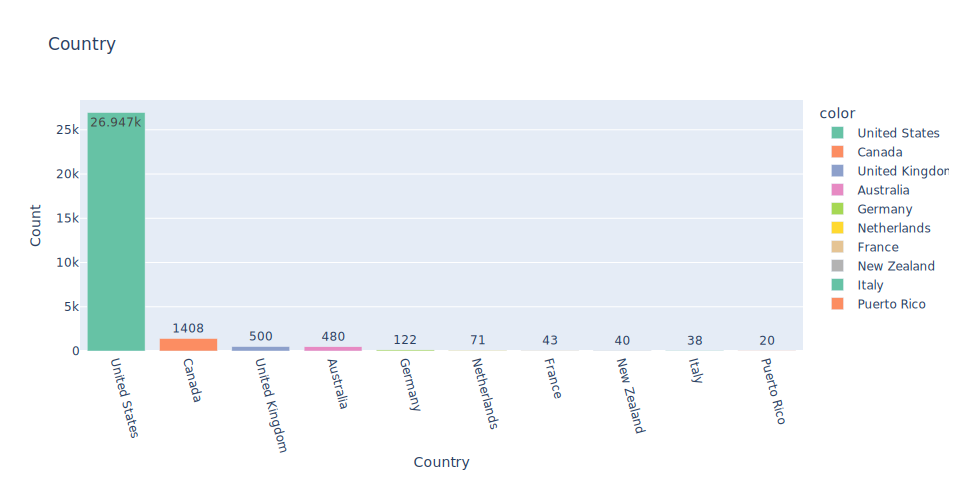

Top 10 purhcases made from each country:
Country
United States     26947
Canada             1408
United Kingdom      500
Australia           480
Germany             122
Netherlands          71
France               43
New Zealand          40
Italy                38
Puerto Rico          20
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Set up the figure size
fig = px.bar(
    x=top_countries.index,
    y=top_countries,
    color=top_countries.index,
    title="Country",
    text=top_countries.values,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2,

)

# Update the layout
fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Count",
    xaxis_tickangle=75,  # Rotate x-axis labels by 75 degrees
    width=12*80,  # Adjust width based on figsize
    height=6*80   # Adjust height based on figsize
)

# Show the plot
fig.show(renderer="svg")
print(f"Top 10 purhcases made from each country:\n{top_countries}")

* The majority of purchases were made in the **United States**, with a total of 26,947 transactions, which is significantly higher than any other country represented in the dataset.
* **Canada** follows as the second-largest market with 1,408 purchases.
* The **United Kingdom and Australia** also have a notable number of transactions, with 500 and 480 purchases respectively.
* The data indicates a wide geographical spread of customers, covering North America, Europe, Oceania, and a part of the Caribbean (Puerto Rico).


In [ ]:
!pip install plotly --upgrade

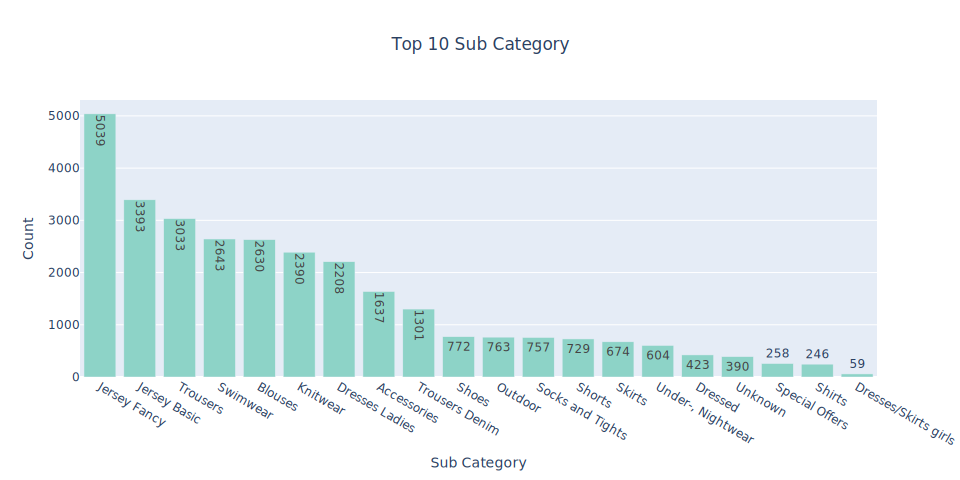

Top 20 purhcases made from each sub category:
Sub Category
Jersey Fancy            5039
Jersey Basic            3393
Trousers                3033
Swimwear                2643
Blouses                 2630
Knitwear                2390
Dresses Ladies          2208
Accessories             1637
Trousers Denim          1301
Shoes                    772
Outdoor                  763
Socks and Tights         757
Shorts                   729
Skirts                   674
Under-, Nightwear        604
Dressed                  423
Unknown                  390
Special Offers           258
Shirts                   246
Dresses/Skirts girls      59
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Calculate main_category counts
sub_category = df['Sub Category'].value_counts().head(20)

# Create bar plot with predefined color palette
fig = px.bar(
x=sub_category.index,
    y=sub_category,
    title='Top 10 Sub Category',
    color_discrete_sequence=px.colors.qualitative.Set3,
    text=sub_category.values,
    text_auto=True
)

# Update layout
fig.update_layout(
    xaxis_title='Sub Category',
    yaxis_title='Count',
    width=12*80, #Adjust width
    height=6*80, #Adjust height
    title_x=0.5  #Center the title
)

# Show plot
fig.show(renderer="svg") # do the pip install step above to render it in github
print(f"Top 20 purhcases made from each sub category:\n{sub_category}")


**Popular Sub Categories:**

* Jersey Fancy: The most popular subcategory, with 5,039 purchases. This indicates a high demand for fancy jersey items.
* Jersey Basic: Follows with 3,393 purchases, showing that basic jersey items are also significantly popular.
* Trousers: Comes next with 3,033 purchases, indicating a strong demand for trousers.

**Moderately Popular Sub Categories:**

* Swimwear and Blouses: Both are quite popular with 2,643 and 2,630 purchases respectively. This suggests a balanced interest in swimwear and blouses.
* Knitwear and Dresses Ladies: Knitwear (2,390) and dresses for ladies (2,208) are also popular choices among customers.

**Accessories and Denim:**

* Accessories: With 1,637 purchases, accessories are also an important category for customers.
* Trousers Denim: Denim trousers are fairly popular with 1,301 purchases.

**Other Notable Sub Categories:**

* Shoes: Footwear is represented with 772 purchases.
* Outdoor and Socks and Tights: These categories have 763 and 757 purchases respectively, indicating a steady interest in these items.
* Shorts and Skirts: Both have a good number of purchases, with 729 and 674 respectively.

**Less Popular Sub Categories:**

* Under-, Nightwear and Dressed: These categories have lower but still notable purchase counts with 604 and 423 respectively.
* Unknown and Special Offers: These categories have fewer purchases, with 390 and 258 respectively.
* Shirts and Dresses/Skirts girls: Among the least popular, with 246 and 59 purchases respectively.

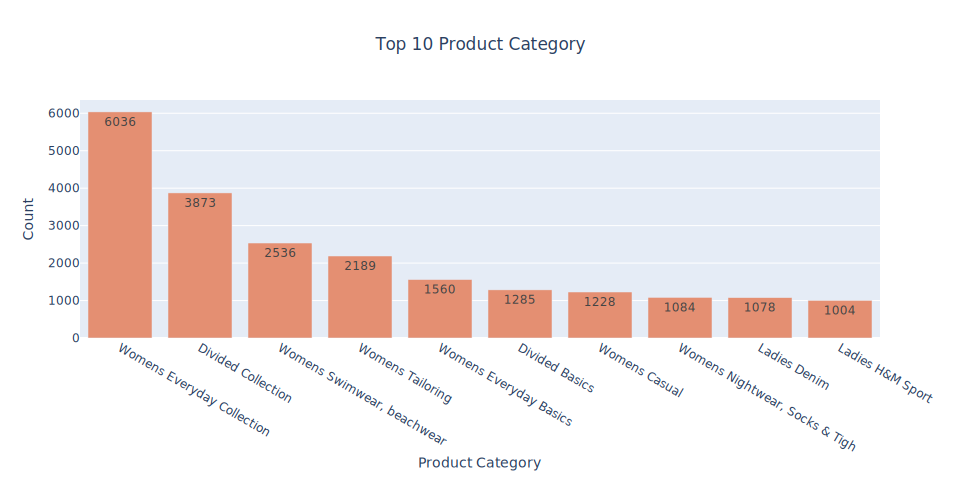

Top 10 purhcases made from each main category:
Product Category
Womens Everyday Collection        6036
Divided Collection                3873
Womens Swimwear, beachwear        2536
Womens Tailoring                  2189
Womens Everyday Basics            1560
Divided Basics                    1285
Womens Casual                     1228
Womens Nightwear, Socks & Tigh    1084
Ladies Denim                      1078
Ladies H&M Sport                  1004
Name: count, dtype: int64


In [ ]:
# Calculate main_category counts
main_category = df['Product Category'].value_counts().head(10)

# Create bar plot with predefined color palette
fig = px.bar(
x=main_category.index,
    y=main_category,
    title='Top 10 Product Category',
    color_discrete_sequence=px.colors.qualitative.Light24_r,
    text=main_category.values,
    text_auto=True
)

# Update layout
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Count',
    width=12*80, #Adjust width
    height=6*80, #Adjust height
    title_x=0.5  #Center the title
)

# Show plot
fig.show(renderer="svg")
print(f"Top 10 purhcases made from each main category:\n{main_category}")

* Womens Everyday Collection is the leading category with 6,036 purchases. This indicates a high demand for everyday women's clothing.
* Divided Collection follows with 3,873 purchases, showcasing its popularity among customers.
* Womens Swimwear, beachwear: With 2,536 purchases, this category is highly sought after, especially for seasonal and vacation needs.
* Womens Tailoring: Professional attire is well-represented with 2,189 purchases.
* Womens Everyday Basics: Essential everyday basics are also popular, with 1,560 purchases.
* Divided Basics: Basic items from the Divided line have 1,285 purchases, indicating a steady demand.
* Womens Casual: Casual wear for women is popular with 1,228 purchases.
* Womens Nightwear, Socks & Tigh: This category has 1,084 purchases, reflecting a good demand for nightwear and hosiery.
* Ladies Denim: Denim items for ladies are popular with 1,078 purchases.
* Ladies H&M Sport: Sport and activewear for women also have a significant following with 1,004 purchases.

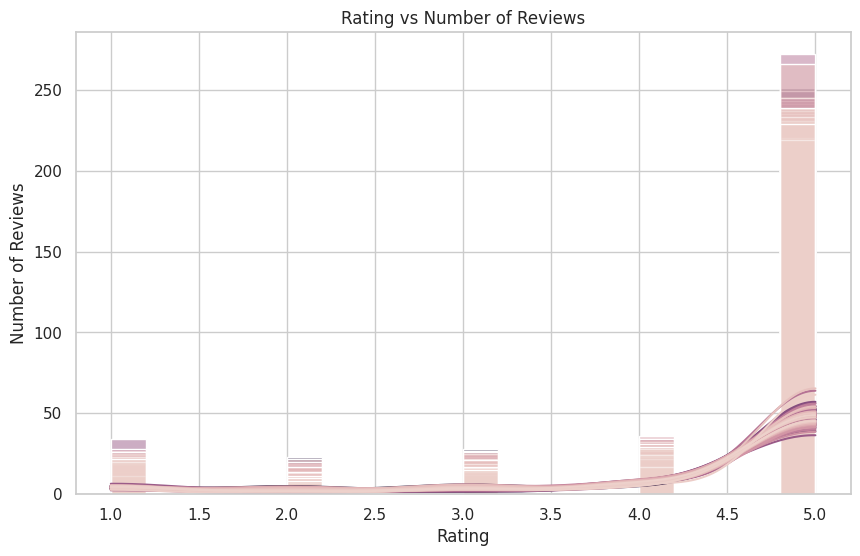

In [ ]:
# Histplot of Rating vs Number of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', hue='Number of Reviews', bins=20, kde=True, legend=False)
plt.title('Rating vs Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


The Kernel Density Estimate (KDE) plot helps visualize the density of the data points across the range of the x-axis variable ('Rating' in this case). It smooths out the histogram and provides additional insight into the distribution of the data.
* The majority of products receive high ratings (around 5.0), which also attract the most reviews.
* There is a noticeable drop in the number of reviews as the ratings decrease.
* The data is heavily skewed towards high ratings, which might reflect customer satisfaction or a tendency to review positively.

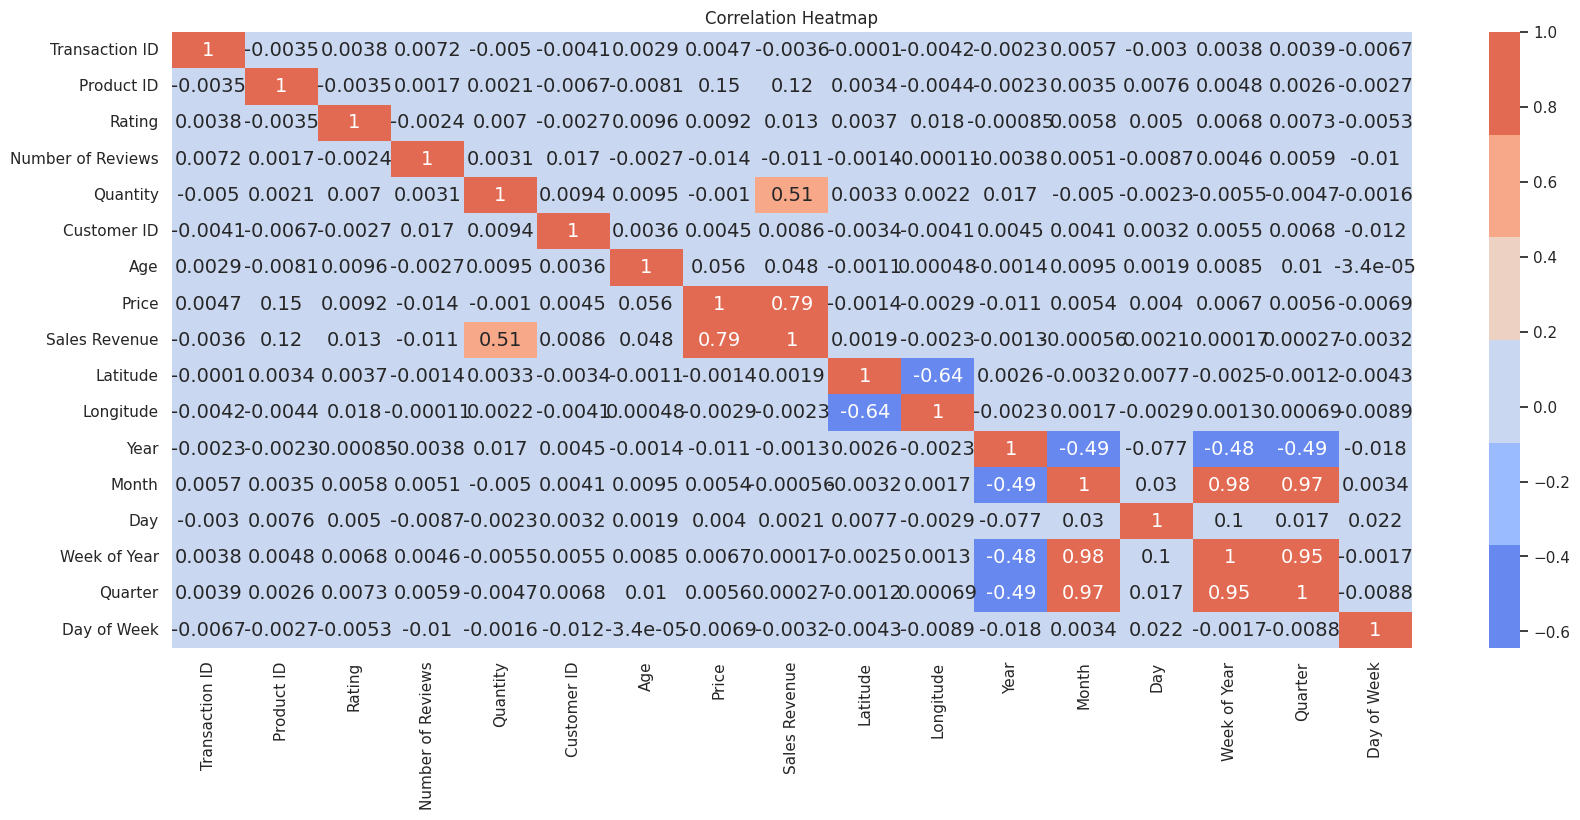

In [ ]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Impute missing values if needed
numeric_df.fillna(0, inplace=True)  # Replace NaN values with 0, you can use other strategies based on your data

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm"), ax=ax)
plt.title('Correlation Heatmap')
plt.show()


* Some strong **positive correlations** are evident:
For example, “Week of Year” and “Month,” suggesting a positive relationship of 0.98.
Another strong positive correlation is seen between "Month" and “Quarter” of 0.97.
* Similarly, some **strong negative correlations** exist:
For instance, “Rank” and "Rating", suggesting a negative relationship of -0.93.

In [ ]:
cat_dis = main_category
cat_dis

Product Category
Womens Everyday Collection        6036
Divided Collection                3873
Womens Swimwear, beachwear        2536
Womens Tailoring                  2189
Womens Everyday Basics            1560
Divided Basics                    1285
Womens Casual                     1228
Womens Nightwear, Socks & Tigh    1084
Ladies Denim                      1078
Ladies H&M Sport                  1004
Name: count, dtype: int64

Womens Everyday Collection seem to be the highest purchased product catergory followed by Divided Collection and Womens Swimwear, beachwear.

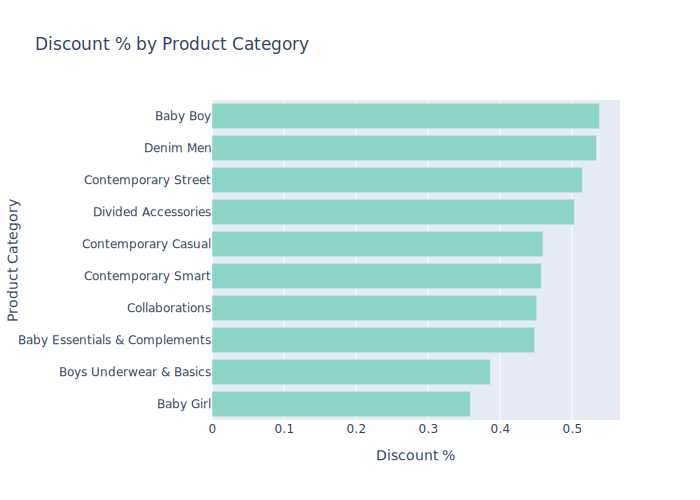

                Product Category  Mean Discount Percentage
0                      Baby Girl                  0.358974
1        Boys Underwear & Basics                  0.386667
2  Baby Essentials & Complements                  0.448485
3                 Collaborations                  0.450980
4             Contemporary Smart                  0.457237
5            Contemporary Casual                  0.459716
6            Divided Accessories                  0.503497
7            Contemporary Street                  0.514620
8                      Denim Men                  0.534247
9                       Baby Boy                  0.538462


In [ ]:
# Calculate mean discount by sub-category
mean_discount_cat = df.groupby('Product Category')['Discounts'].mean().head(10)
mean_discount_cat = mean_discount_cat.sort_values(ascending=True)

# Create DataFrame for table
cat = pd.DataFrame({'Product Category': mean_discount_cat.index, 'Mean Discount Percentage': mean_discount_cat.values})

# Create horizontal bar chart using Plotly Express
fig = px.bar(mean_discount_cat, y=mean_discount_cat.index, x=mean_discount_cat.values, orientation='h',
             title='Discount % by Product Category',
             color_discrete_sequence=px.colors.qualitative.Set3,
             labels={'x': 'Discount %', 'y': 'Product Category'})
fig.show(renderer="svg")
print(cat)

The highest discounts product category are there for Baby Boy: Mean Discount Percentage = 53.85%. Denim Men: Mean Discount Percentage = 53.42%, Contemporary Street: Mean Discount Percentage = 51.46%.


Baby Girl: Mean Discount Percentage = 35.90% has the least product category discount.

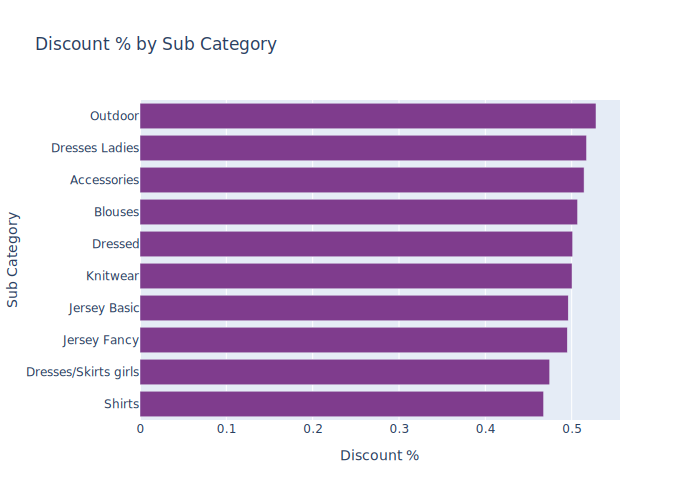

           Sub Category  Mean Discount Percentage
0                Shirts                  0.467480
1  Dresses/Skirts girls                  0.474576
2          Jersey Fancy                  0.494939
3          Jersey Basic                  0.496021
4              Knitwear                  0.500418
5               Dressed                  0.501182
6               Blouses                  0.506844
7           Accessories                  0.514356
8        Dresses Ladies                  0.517210
9               Outdoor                  0.528178


In [ ]:
# Calculate mean discount by sub-category
mean_discount_subcat = df.groupby('Sub Category')['Discounts'].mean().head(10)
mean_discount_subcat = mean_discount_subcat.sort_values(ascending=True)

# Create DataFrame for table
sub_cat = pd.DataFrame({'Sub Category': mean_discount_subcat.index, 'Mean Discount Percentage': mean_discount_subcat.values})

# Create horizontal bar chart using Plotly Express
fig = px.bar(mean_discount_subcat, y=mean_discount_subcat.index, x=mean_discount_subcat.values, orientation='h',
             title='Discount % by Sub Category',\
             color_discrete_sequence=px.colors.qualitative.Bold,
             labels={'x': 'Discount %', 'y': 'Sub Category'})
fig.show(renderer="svg")
print(sub_cat)

**Shirts**: Mean Discount Percentage = 46.75% has the least discounted sub category.

**Outdoor**: Mean Discount Percentage = 52.82% and Dresses Ladies: Mean Discount Percentage = 51.72% has the highest sub category discounts.


Since, we do not have Continents in the datatset, we're going to add a new column for 'Continent'.

In [ ]:
# Dictionary mapping countries to continents
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'France': 'Europe',
    'China': 'Asia',
    'Australia': 'Australia',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'India': 'Asia',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'UK': 'Europe',
    'US': 'North America'
}

# Function to get continent from country name
def get_continent(country):
    return country_to_continent.get(country, None)

# Add 'Continent' column
df['Continent'] = df['Country'].apply(get_continent)

df.sample()

Transaction ID       Date  Product ID Product Name  \
28458           29732 2019-06-21      818894    Geri body   

                                     Product Description  Product Category  \
28458  Long-sleeved, turtleneck body with a cut-out s...  Divided Selected   

       Sub Category  Color  Rating Product Review  Number of Reviews  \
28458  Jersey Fancy  Black       5            NaN                 86   

       Quantity  Customer ID   Customer Name   Age     Price Currency  \
28458         3       575629  Richard Turner  25.0  0.017831       US   

       Discounts  Sales Revenue  Payment Method                Store Type  \
28458      False       0.042793  Mobile Payment  high street chain stores   

       Season  Latitude  Longitude        Country  Year  Month  Day WeekDay  \
28458  Winter  37.09024 -95.712891  United States  2019      6   21  Friday   

       Week of Year  Quarter  Day of Week Time of Day      Continent  
28458            25        2            4         NaN  North America

In [ ]:
max_sales_year = df.query("Year == 2019") # Filter data for 2019, since we saw that the sales are higest for 2019
max_sales_year.loc[max_sales_year['Continent'].isnull(), 'Continent'] = 'Unknown' # Categorizing any null with 'Unknown' for Continent
max_sales_year.loc[max_sales_year['Country'].isnull(), 'Country'] = 'Unknown' # Categorizing any null with 'Unknown' for Country
max_sales_year["World"] = "World" # Defining an outer feature than encapsulates all Continents as 'World.

In [ ]:
max_sales_year.head()

Transaction ID       Date  Product ID                 Product Name  \
0             4201 2019-07-02      678602             Alana Lace Dress   
2             3871 2019-05-22      830508              ED Strap top 3p   
4            28692 2019-04-24      819143            H2 Aster dress PI   
7            17489 2019-03-23      684209  Simple as That Triangle Top   
11           10345 2019-04-26      399256    Skinny Ankle R.W Brooklyn   

                                  Product Description  \
0   Lace dress with short cap sleeves and an openi...   
2   Fitted tops in soft, organic cotton jersey wit...   
4   Long dress in patterned chiffon crêpe with smo...   
7   Lined, non-wired, triangle bikini top with a w...   
11  Ankle-length jeans in washed stretch denim wit...   

              Product Category          Sub Category            Color  Rating  \
0                    Kids Girl  Dresses/Skirts girls              Red       5   
2                         H&M+          Jersey Fancy            Black       5   
4   Womens Everyday Collection        Special Offers  Yellowish Brown       5   
7   Womens Swimwear, beachwear              Swimwear            Black       5   
11                Ladies Denim        Trousers Denim            Black       4   

                                       Product Review  Number of Reviews  \
0   The items I purchased we enthusiastically rece...                 78   
2   Very much appreciate the variety of tees that ...                 41   
4   Fun, cool Randy Rainbow t-shirt!Thank you for ...                 44   
7      Everything was just as pictured and I love it.                 53   
11                    Come quickly, and love the tee.                 15   

    Quantity  Customer ID     Customer Name   Age     Price Currency  \
0          2       230653        Jared Hall  38.0  0.016932       US   
2          1       149431    Michael Butler  50.0  0.025407       US   
4          3       409920    Katelyn Harris  45.0  0.020322       US   
7          1       487734   Patrick Fischer  30.0  0.025407       US   
11         1       181971  Christina Martin  37.0  0.016932       US   

    Discounts  Sales Revenue Payment Method                Store Type  Season  \
0       False       0.027092           Cash     independent boutiques  Autumn   
2        True       0.020325    Credit Card     independent boutiques  Autumn   
4       False       0.048773    Credit Card             luxury brands  Summer   
7        True       0.020325    Credit Card             luxury brands  Spring   
11      False       0.013546    Credit Card  high street chain stores  Winter   

    Latitude  Longitude        Country  Year  Month  Day    WeekDay  \
0   37.09024 -95.712891  United States  2019      7    2    Tuesday   
2   37.09024 -95.712891  United States  2019      5   22  Wednesday   
4   37.09024 -95.712891  United States  2019      4   24  Wednesday   
7   37.09024 -95.712891  United States  2019      3   23   Saturday   
11  37.09024 -95.712891  United States  2019      4   26     Friday   

    Week of Year  Quarter  Day of Week Time of Day      Continent  World  
0             27        3            1         NaN  North America  World  
2             21        2            2         NaN  North America  World  
4             17        2            2         NaN  North America  World  
7             12        1            5         NaN  North America  World  
11            17        2            4         NaN  North America  World

A treemap is an effective way to visualize hierarchical data by representing each category or sub-category as a rectangle, with the size of the rectangle proportional to a specific metric, such as sales, quantities, or in this case, mean 'Sales Revenue'.

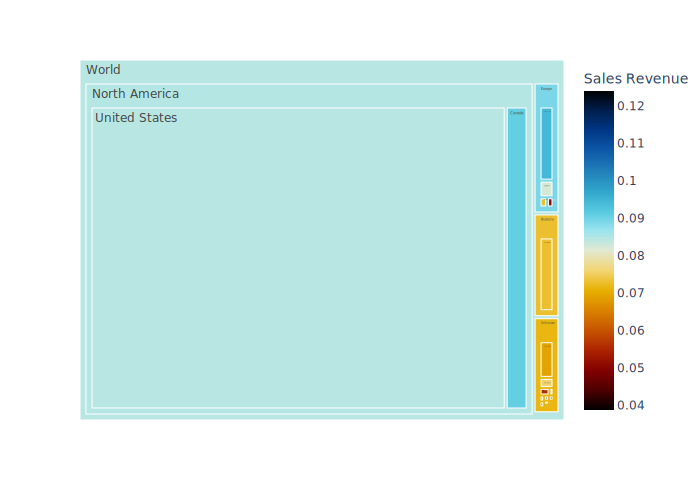

In [ ]:
# Plotting a Tree map
fig = px.treemap(max_sales_year,
                 path=['World','Continent', 'Country'],
                 values='Price',
                 color='Sales Revenue',
                 color_continuous_scale='icefire_r')
fig.show(renderer="svg")

It is clearly evident that **United States has the largest of 'Sales Revenue' followed by Canada**. Italy has the least 'Sales Revenue'.

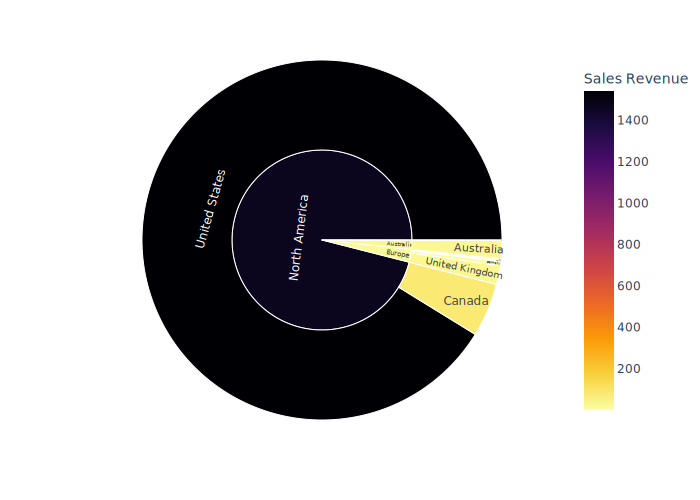

Sales Revenue by Continent:
       Continent         Country  Sales Revenue
7  North America   United States    1542.031661
6  North America          Canada      81.413437
5         Europe  United Kingdom      28.354875
1      Australia       Australia      27.679308
3         Europe         Germany       6.322671
2         Europe          France       2.312624
4         Europe           Italy       1.761342
0           Asia           Japan       0.636692


In [ ]:
sales_rev = df.groupby(['Continent', 'Country'])['Sales Revenue'].sum().reset_index().sort_values(by='Sales Revenue', ascending=False)

fig = px.sunburst(sales_rev,
                 path=['Continent', 'Country'],
                 values='Sales Revenue',
                 color='Sales Revenue',
                 color_continuous_scale='Inferno_r')
fig.show(renderer="svg")
print(f'Sales Revenue by Continent:\n{sales_rev}')

The sales revenue data, categorized by continent, shows that North America leads significantly with the **United States generating the highest revenue at 1542.03 units**, followed by Canada with 81.41 units. Europe is the next highest, with the United Kingdom contributing 28.35 units, Germany 6.32 units, France 2.31 units, and Italy 1.76 units. Australia, as a continent and country, has a sales revenue of 27.68 units. Asia, represented solely by Japan, has the lowest revenue at 0.64 units. This data indicates that North America, primarily due to the United States, is the dominant market in terms of sales revenue, while Europe shows a moderate contribution with multiple countries, and Asia and Australia have relatively minimal sales revenue contributions.

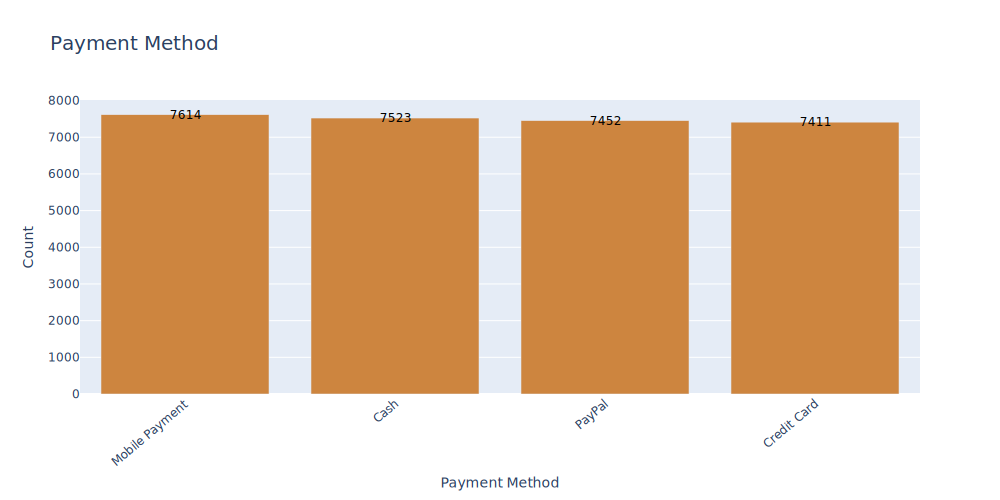

In [ ]:
# import plotly go
import plotly.graph_objects as go
# Sort the DataFrame by the count of each payment method
payment_method_counts = df['Payment Method'].value_counts()

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(x=payment_method_counts.index, y=payment_method_counts.values, marker=dict(color='peru'))
])

# Customize the layout
for i, count in enumerate(payment_method_counts.values):
    fig.add_annotation(
        x=payment_method_counts.index[i],
        y=count,
        text=f"{count}",
        showarrow=False,
        font=dict(color="black")
    )

# Update layout
fig.update_layout(
    title="Payment Method",
    xaxis=dict(title="Payment Method"),
    yaxis=dict(title="Count"),
    title_font=dict(size=20),
    xaxis_tickangle=-40,
    width=1000,
    height=500,
    bargap=0.2,
)

# Show plot
fig.show(renderer="svg")

We see that majority of the payments are made using 'Mobile Payment', followed by Cash and then Paypal. This is a surprising that credit card payments were the least opted payment method.

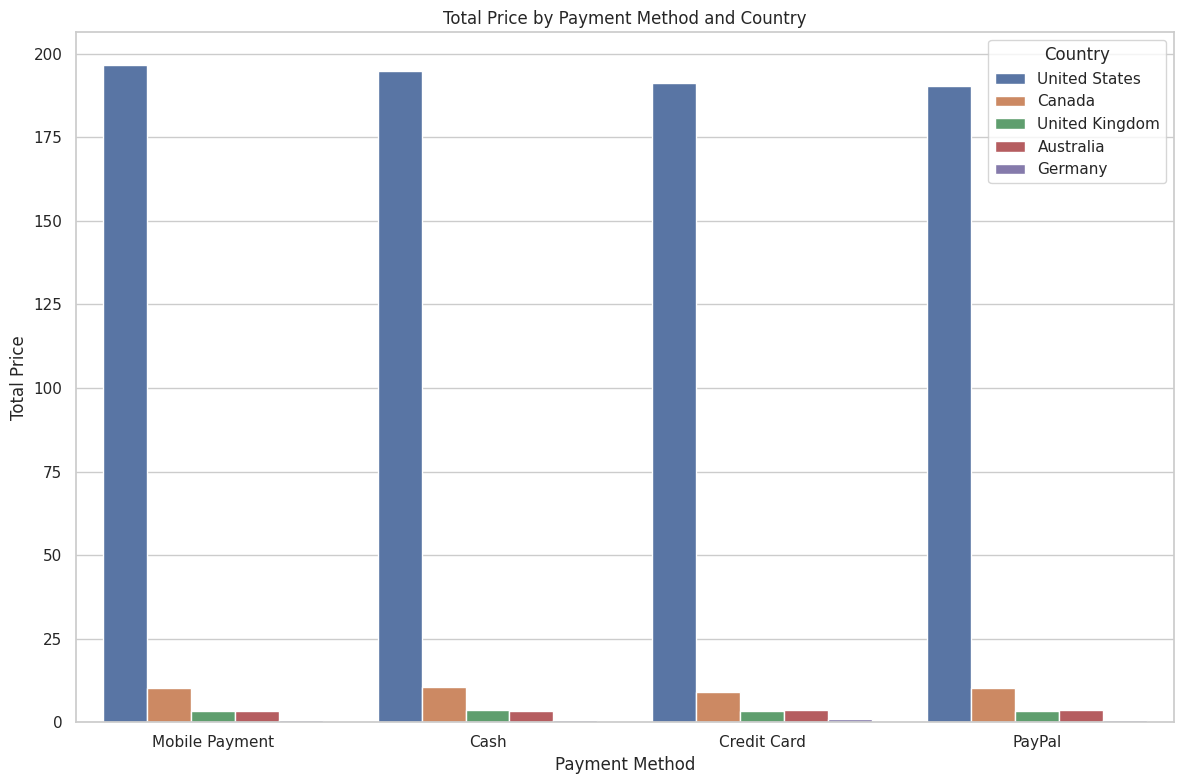

Top 30 purchases made from each payment method:
           Country  Payment Method       Price
81   United States  Mobile Payment  196.580814
79   United States            Cash  194.692356
80   United States     Credit Card  191.109627
82   United States          PayPal  190.278322
4           Canada            Cash   10.690915
7           Canada          PayPal   10.367780
6           Canada  Mobile Payment   10.334881
5           Canada     Credit Card    9.130203
75  United Kingdom            Cash    3.737000
1        Australia     Credit Card    3.650017
3        Australia          PayPal    3.521831
2        Australia  Mobile Payment    3.482831
76  United Kingdom     Credit Card    3.455915
78  United Kingdom          PayPal    3.356763
77  United Kingdom  Mobile Payment    3.278559
0        Australia            Cash    3.262915
24         Germany     Credit Card    0.885814
26         Germany          PayPal    0.818492
25         Germany  Mobile Payment    0.696525
23         G

In [ ]:
# Aggregate the data by Country and Payment Method, summing the Price
aggregated_data = df.groupby(['Country', 'Payment Method'])['Price'].sum().reset_index().sort_values(by='Price', ascending=False)
aggregated_data = aggregated_data.head(20)

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=aggregated_data, x='Payment Method', y='Price', hue='Country')
plt.title('Total Price by Payment Method and Country')
plt.xlabel('Payment Method')
plt.ylabel('Total Price')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

print(f"Top 30 purchases made from each payment method:\n{aggregated_data}")

- **United States**: Shows high average purchase prices across all payment methods, with mobile payment slightly leading, followed closely by cash and credit card, and then PayPal.

- **Canada**: Cash transactions have the highest average purchase price, followed by PayPal, with mobile payment and credit card transactions having lower average purchase prices.

- **United Kingdom**: Cash transactions again have the highest average purchase price, followed by credit card, with PayPal and mobile payment transactions having lower average purchase prices.

- **Australia**: Credit card transactions have the highest average purchase price, followed by PayPal, with mobile payment and cash transactions having lower average purchase prices.

- **Germany**: Credit card transactions have the highest average purchase price, followed by PayPal, with mobile payment and cash transactions having lower average purchase prices.

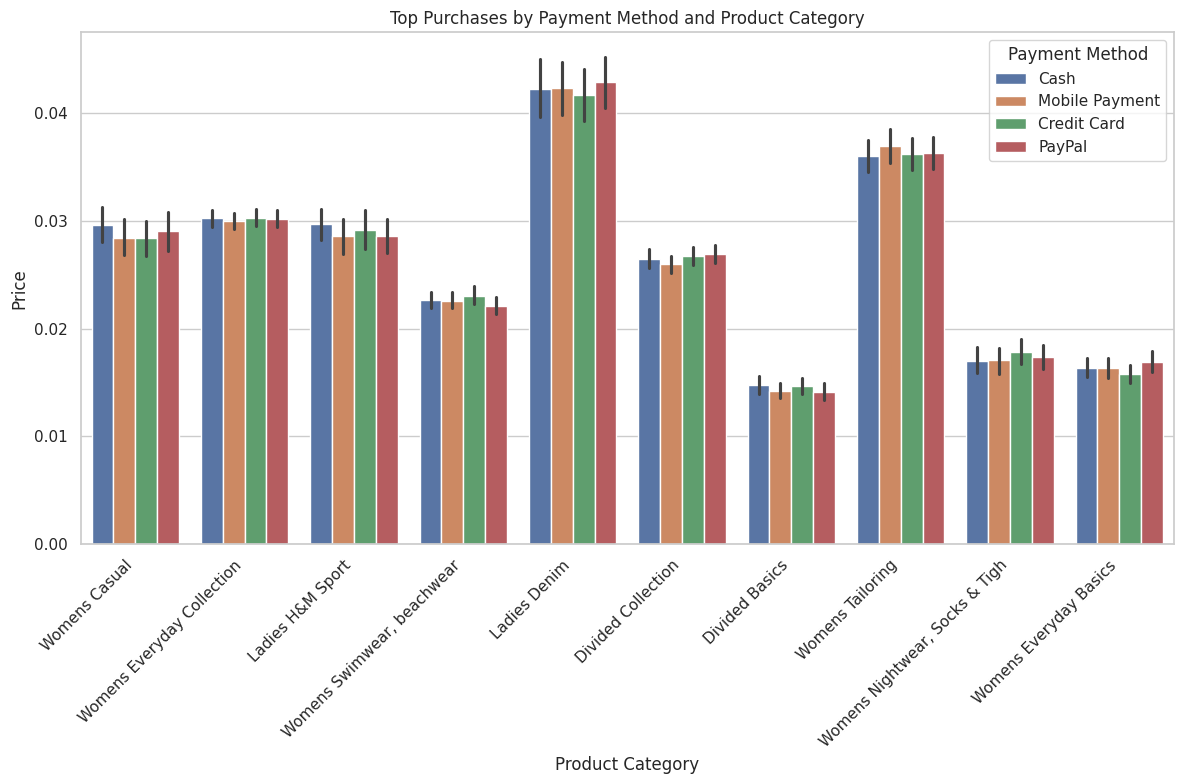

Top 10 purchases made from each payment method:
       Transaction ID       Date  Product ID                 Product Name  \
1                  79 2020-09-18      572797   ESSENTIAL TANKTOP LACE TVP   
3               27673 2018-10-10      693242                         Bama   
4               28692 2019-04-24      819143            H2 Aster dress PI   
6                1838 2018-09-20      633870       DENVER ls hood sweater   
7               17489 2019-03-23      684209  Simple as That Triangle Top   
...               ...        ...         ...                          ...   
29993           11230 2018-10-13      730683             HAVANA HW tights   
29994             886 2019-05-09      679853              Sirpa Basic TVP   
29997            4430 2019-11-18      590928            New Girl Push Top   
29998            6217 2018-11-02      858052                       Verina   
29999           29671 2019-12-23      548613                       Jordan   

                           

In [ ]:
# Sort the top 10 customer categories by value counts
top_10_customer_categories = df['Product Category'].value_counts().iloc[:10].index.tolist()

# Filter the DataFrame for the top 10 customer categories
df_top_10 = df[df['Product Category'].isin(top_10_customer_categories)]

# Set seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_10, x='Product Category', y='Price', hue='Payment Method')
plt.title('Top Purchases by Payment Method and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.legend(title='Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Top 10 purchases made from each payment method:\n{df_top_10}")

Key findings:
- **Mobile Payment**: Customers tend to purchase a diverse range of items using mobile payment, including dresses, tees, denim trousers, swimwear, and knitwear. The transactions primarily occur in the United States.

- **Cash**: Cash transactions often involve basic apparel items such as tees and denim trousers. The purchases are spread across different countries, with a significant portion occurring in the United States.

- **Credit Card**: Credit card transactions cover a wide array of product categories, including denim trousers, dresses, swimwear, and knitwear. They are prevalent in the United States and involve diverse customer demographics.

- **PayPal**: PayPal transactions encompass various product categories, with a focus on swimwear, denim trousers, dresses, and knitwear. These purchases are common in the United States and involve customers of different ages.

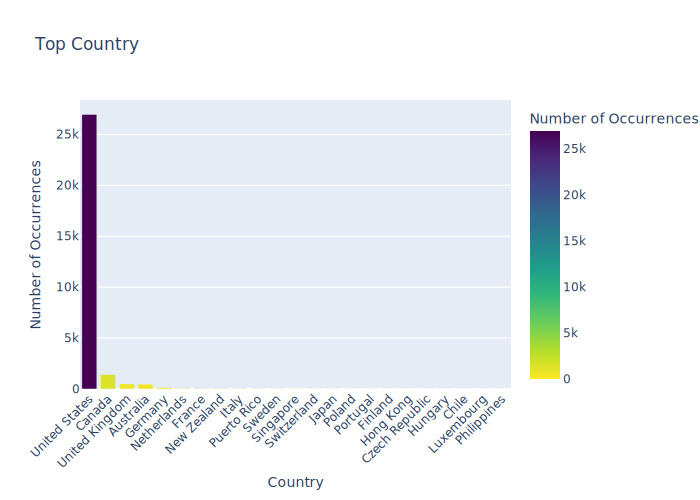

Top 30 purchases made from each country:
Country
United States     26947
Canada             1408
United Kingdom      500
Australia           480
Germany             122
Netherlands          71
France               43
New Zealand          40
Italy                38
Puerto Rico          20
Sweden               14
Singapore            13
Switzerland          12
Japan                10
Poland               10
Portugal              9
Finland               8
Hong Kong             8
Czech Republic        6
Hungary               5
Chile                 3
Luxembourg            2
Philippines           1
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Count occurrences of each State
state_counts = df['Country'].value_counts().head(30)

# Create a DataFrame from State counts
state_counts_df = pd.DataFrame({'Country': state_counts.index, 'Count': state_counts.values})

# Plot using Plotly
fig = px.bar(state_counts_df, x='Country', y='Count',
             title='Top Country',
             labels={'Count': 'Number of Occurrences', 'Country': 'Country'},
             color='Count',  # Color based on count
             color_continuous_scale='viridis_r')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show(renderer="svg")
print(f"Top 30 purchases made from each country:\n{state_counts}")

The data indicates the distribution of purchases across different countries, with the **United States** dominating the number of purchases, followed by **Canada**, the United Kingdom, and Australia. This summary provides insights into the geographical distribution of consumer activity, highlighting regions with significant purchasing power and potential market opportunities.

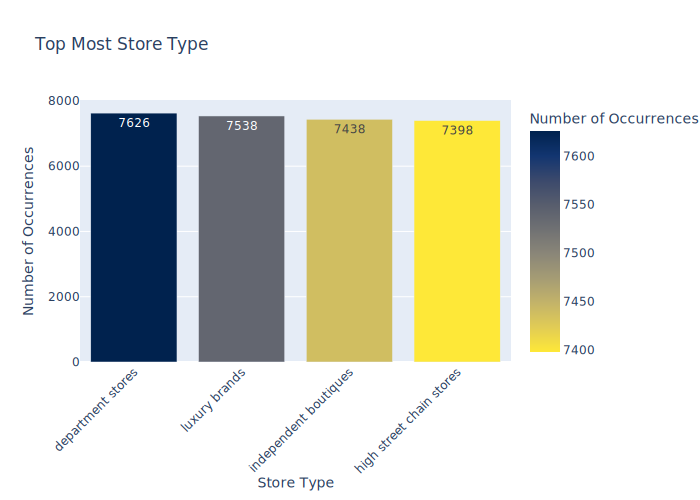

In [ ]:
# Count occurrences of each Store Type
storetype_counts = df['Store Type'].value_counts().head(30)

# Create a DataFrame from Store Type counts
storetype_counts_df = pd.DataFrame({'Store Type': storetype_counts.index, 'Count': storetype_counts.values})

# Plot using Plotly
fig = px.bar(storetype_counts_df, x='Store Type', y='Count',
             title='Top Most Store Type',
             labels={'Count': 'Number of Occurrences', 'Store Type': 'Store Type'},
             color='Count',
             text_auto=True,
             color_continuous_scale='Cividis_r')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show(renderer="svg")

We see that 'department stores' are in highest numbers followed by luxury brands and independent boutiques. High Street chain stores are the least to comapred to other store tyrpes. The numbers different from one another by only few hunderds.

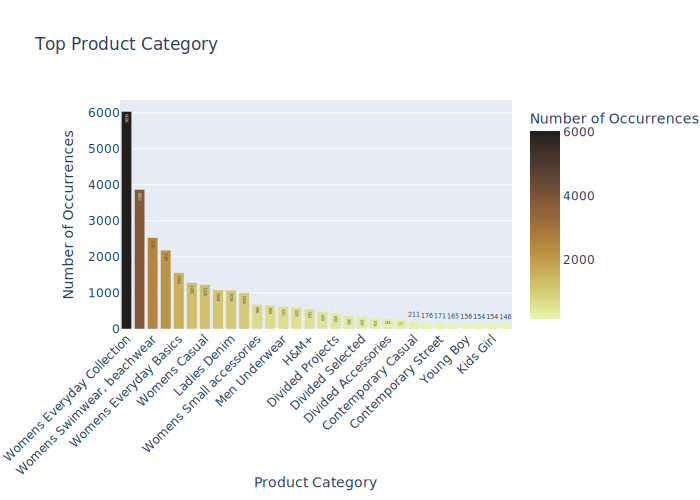

Top 30 purchases made from each product category:
Product Category
Womens Everyday Collection        6036
Divided Collection                3873
Womens Swimwear, beachwear        2536
Womens Tailoring                  2189
Womens Everyday Basics            1560
Divided Basics                    1285
Womens Casual                     1228
Womens Nightwear, Socks & Tigh    1084
Ladies Denim                      1078
Ladies H&M Sport                  1004
Womens Small accessories           686
Womens Shoes                       664
Men Underwear                      625
Womens Trend                       593
H&M+                               553
Womens Big accessories             479
Divided Projects                   432
Womens Jackets                     365
Divided Selected                   339
Contemporary Smart                 304
Divided Accessories                286
Mama                               257
Contemporary Casual                211
Young Girl                         1

In [ ]:
# Count occurrences of each Customer Category
customer_cat_counts = df['Product Category'].value_counts().head(30)

# Create a DataFrame from Customer Category counts
customer_cat_counts_df = pd.DataFrame({'Product Category': customer_cat_counts.index, 'Count': customer_cat_counts.values})

# Plot using Plotly
fig = px.bar(customer_cat_counts_df, x='Product Category', y='Count',
             title='Top Product Category',
             labels={'Count': 'Number of Occurrences', 'Product Category': 'Product Category'},
             color='Count', text_auto=True,
             color_continuous_scale='turbid')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show(renderer="svg")
print(f"Top 30 purchases made from each product category:\n{customer_cat_counts}")

- **Womens Everyday Collection**: Leading in purchases with 6036 transactions, indicating a strong demand for everyday women's clothing.
- **Divided Collection**: Following closely with 3873 purchases, suggesting popularity in the divided collection segment.
- **Womens Swimwear, beachwear**: With 2536 transactions, indicating a significant interest in swimwear and beachwear.
- **Womens Tailoring**: Garnering 2189 purchases, reflecting demand for tailored women's clothing.
- **Womens Everyday Basics**: At 1560 purchases, highlighting the importance of basic wardrobe staples.
- **Divided Basics**: With 1285 transactions, indicating interest in basic items from the divided collection.
- **Womens Casual**: With 1228 purchases, suggesting a preference for casual women's clothing.
- **Womens Nightwear, Socks & Tights**: At 1084 purchases, reflecting demand for nightwear and related items.
- **Ladies Denim**: With 1078 transactions, indicating a significant market for women's denim products.
- **Ladies H&M Sport**: At 1004 purchases, showing interest in sportswear for women.

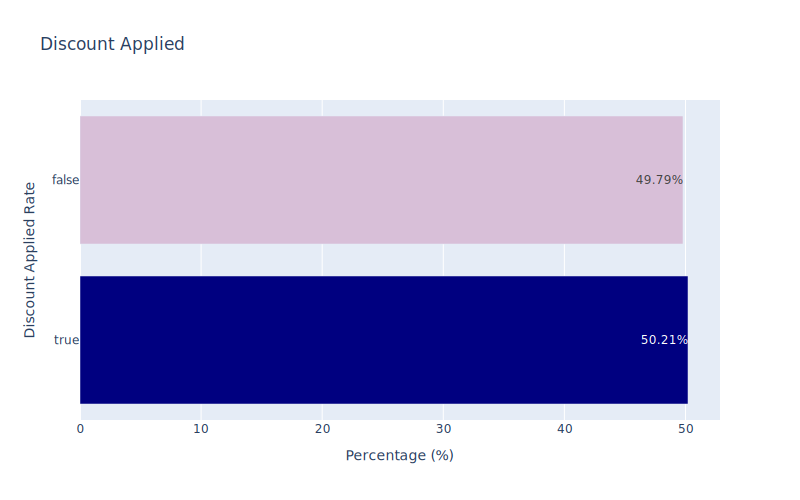

Discount Applied Rate:
Discounts
True     50.206667
False    49.793333
Name: proportion, dtype: float64


In [ ]:
import plotly.graph_objects as go

# Calculate discount applied rate
Discount_Applied = df['Discounts'].value_counts(normalize=True) * 100

# Create a bar plot using Plotly
fig = go.Figure()

# Add horizontal bars
fig.add_trace(go.Bar(
    y=Discount_Applied.index,
    x=Discount_Applied.values,
    orientation='h',
    text=[f'{val:.2f}%' for val in Discount_Applied.values],
    textposition='auto',
    marker=dict(color=['navy', 'thistle'])
))

# Update layout
fig.update_layout(
    title='Discount Applied',
    xaxis_title='Percentage (%)',
    yaxis_title='Discount Applied Rate',
    # yaxis=dict(autorange="reversed"),  # Invert y-axis
    width=800,
    height=500
)

fig.show(renderer="svg")
print(f"Discount Applied Rate:\n{Discount_Applied}")

There's a slight majority of purchases with discounts applied, accounting for approximately **50.21% of transactions**. Conversely, transactions without discounts represent approximately 49.79% of the total purchases. This balanced distribution suggests that discounts are commonly utilized within the retail environment, playing a significant role in influencing consumer purchasing decisions.

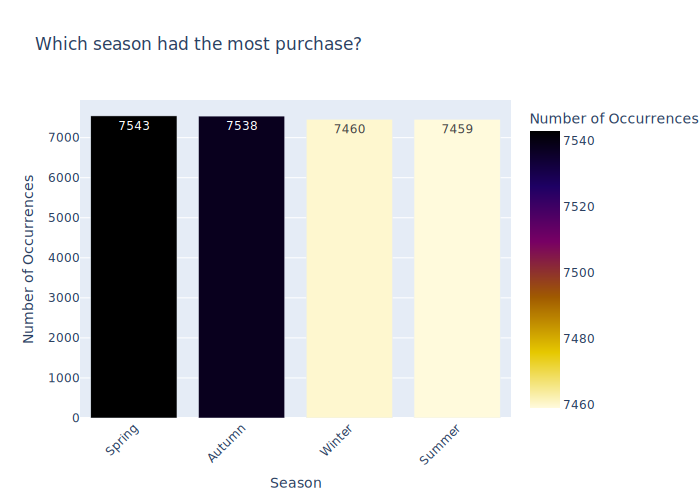

Top 30 purchases made from each season:
Season
Spring    7543
Autumn    7538
Winter    7460
Summer    7459
Name: count, dtype: int64


In [ ]:
import plotly.express as px

# Count occurrences of each Season
season_counts = df['Season'].value_counts().head(30)

# Create a DataFrame from Season counts
season_counts_df = pd.DataFrame({'Season': season_counts.index, 'Count': season_counts.values})

# Plot using Plotly
fig = px.bar(season_counts_df, x='Season', y='Count',
             title='Which season had the most purchase?',
             labels={'Count': 'Number of Occurrences', 'Season': 'Season'},
             color='Count',
             text_auto=True,
             color_continuous_scale='Electric_r')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show plot
fig.show(renderer="svg")
print(f"Top 30 purchases made from each season:\n{season_counts}")

There is a relatively balanced distribution of purchases across the four seasons: Spring, Autumn, Winter, and Summer. Each season accounts for a similar number of purchases, indicating consistent consumer spending throughout the year. This suggests that consumer behavior remains relatively stable across seasons, with no significant fluctuations in purchasing patterns.

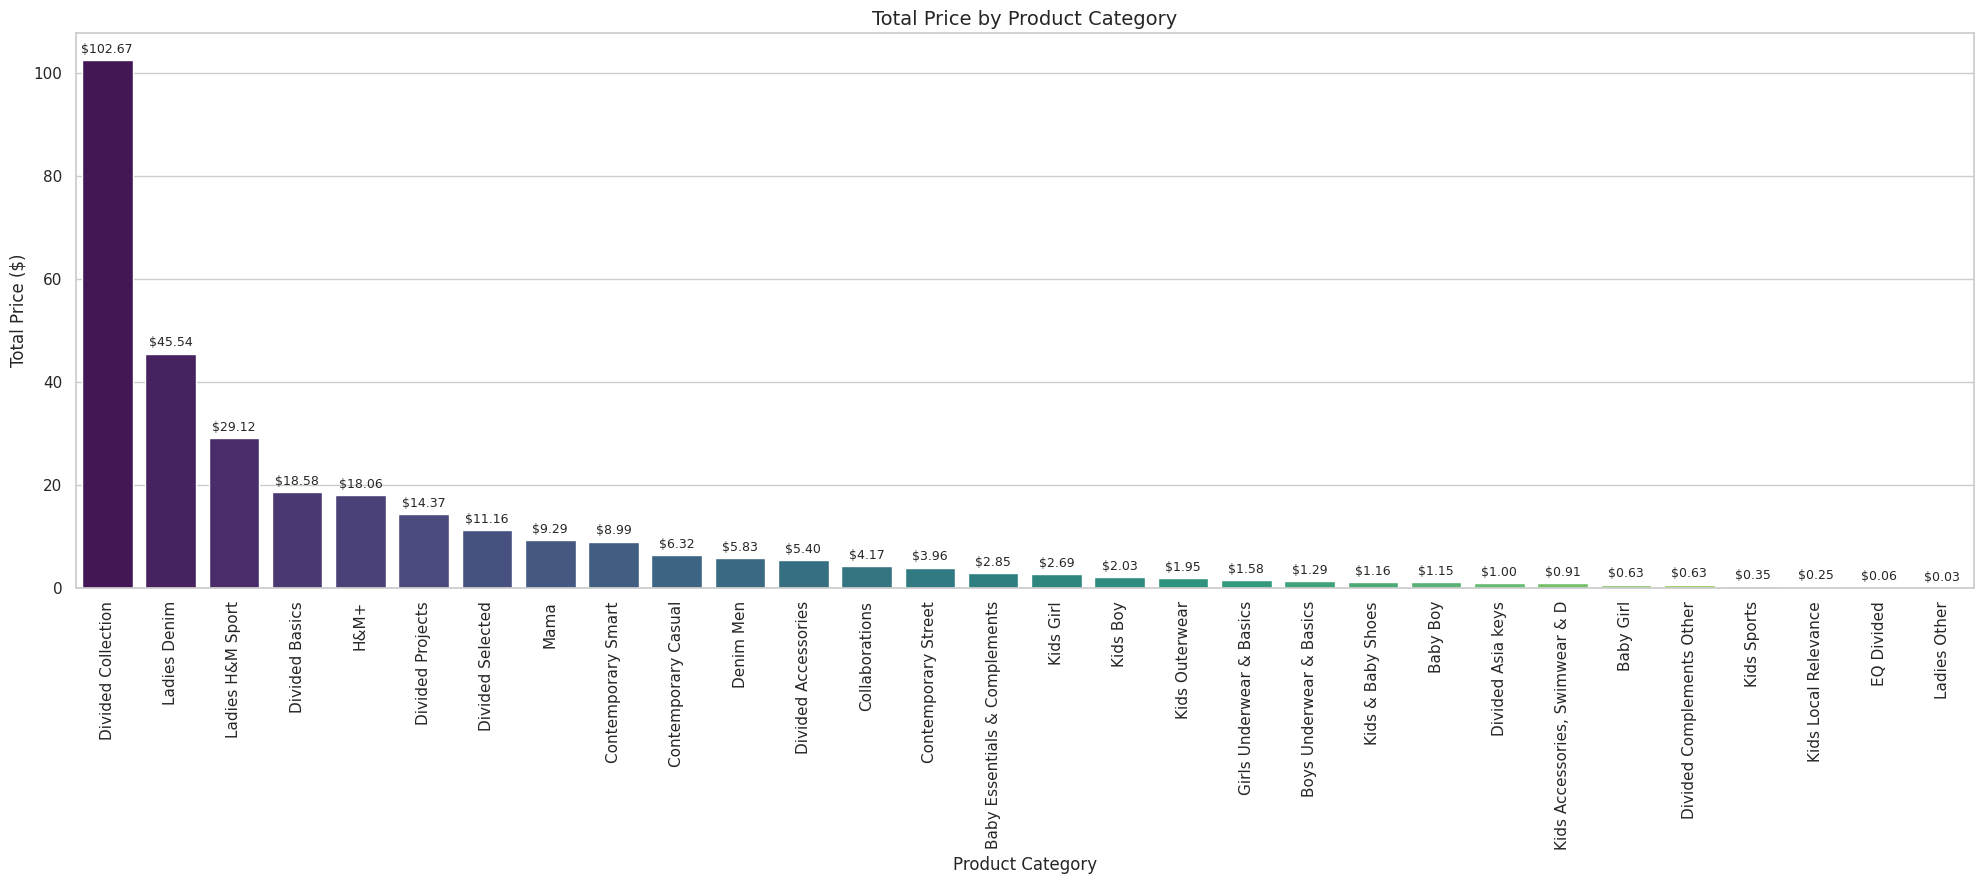

Top 30 purchases made from each product category:
                  Product Category       Price
0                         Baby Boy    1.149237
1    Baby Essentials & Complements    2.848153
2                        Baby Girl    0.634932
3          Boys Underwear & Basics    1.293949
4                   Collaborations    4.173881
5              Contemporary Casual    6.324169
6               Contemporary Smart    8.988932
7              Contemporary Street    3.958966
8                        Denim Men    5.832305
9              Divided Accessories    5.400407
10               Divided Asia keys    1.001644
11                  Divided Basics   18.578288
12              Divided Collection  102.666729
13       Divided Complements Other    0.632169
14                Divided Projects   14.369932
15                Divided Selected   11.155254
16                      EQ Divided    0.059305
17        Girls Underwear & Basics    1.580559
18                            H&M+   18.056322
19        

In [ ]:
total_sales_per_category = df.groupby('Product Category')['Price'].sum().reset_index().head(30)

sorted_categories_by_price = total_sales_per_category.sort_values('Price', ascending=False)

plt.figure(figsize=(20, 9))
ax = sns.barplot(data=sorted_categories_by_price, x='Product Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Price ($)', fontsize=12)
plt.title('Total Price by Product Category', fontsize=14)

plt.tight_layout()

plt.show()
print(f"Top 30 purchases made from each product category:\n{total_sales_per_category}")

From essentials for babies to trendy contemporary wear for both men and women, the data reflects varying consumer preferences and price ranges. Notably, some categories like "**Divided Collection**" and "**Ladies Denim**" show higher-priced items, while others like "**Kids Local Relevance**" and "**EQ Divided**" represent more niche or lower-priced products.

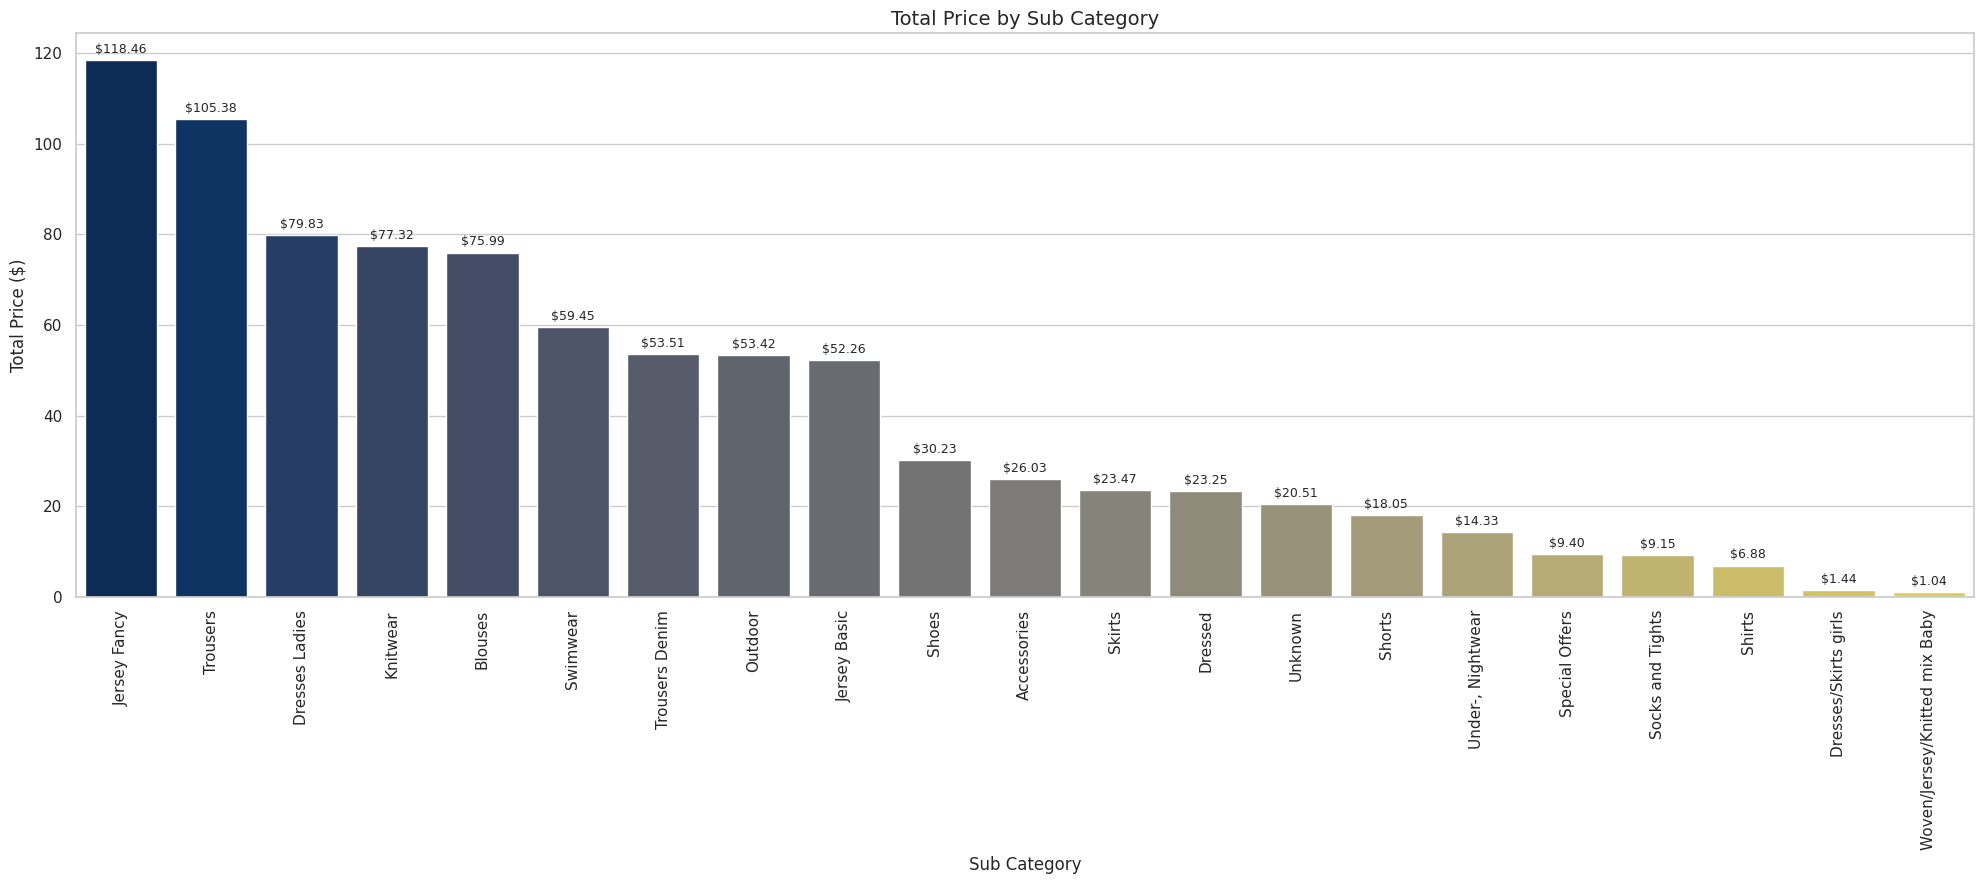

Top 30 purchases made from each sub category:
                     Sub Category       Price
0                     Accessories   26.032153
1                         Blouses   75.991203
2                         Dressed   23.246695
3                  Dresses Ladies   79.831763
4            Dresses/Skirts girls    1.438729
5                    Jersey Basic   52.264203
6                    Jersey Fancy  118.459356
7                        Knitwear   77.323220
8                         Outdoor   53.418729
9                          Shirts    6.875373
10                          Shoes   30.233542
11                         Shorts   18.050542
12                         Skirts   23.469390
13               Socks and Tights    9.151508
14                 Special Offers    9.397898
15                       Swimwear   59.454119
16                       Trousers  105.376508
17                 Trousers Denim   53.511559
18              Under-, Nightwear   14.333203
19                        Unknown 

In [ ]:
total_sales_per_subcategory = df.groupby('Sub Category')['Price'].sum().reset_index().head(30)

sorted_subcategories_by_price = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(20, 9))
ax = sns.barplot(data=sorted_subcategories_by_price, x='Sub Category', y='Price', palette='cividis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Price ($)', fontsize=12)
plt.title('Total Price by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()
print(f"Top 30 purchases made from each sub category:\n{total_sales_per_subcategory}")

Firstly, there's a clear preference for high-priced items in categories like **Jersey Fancy** and **Dresses Ladies**, indicating a demand for more premium fashion choices. Conversely, basic essentials such as Shirts and Socks and Tights show lower average prices, suggesting a focus on practicality and affordability. Additionally, the prominence of Swimwear and Outdoor apparel underscores consumer interest in seasonal and recreational wear.

In [ ]:
# convert df['Date] to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       30000 non-null  int64         
 1   Date                 30000 non-null  datetime64[ns]
 2   Product ID           30000 non-null  int64         
 3   Product Name         30000 non-null  object        
 4   Product Description  29929 non-null  object        
 5   Product Category     30000 non-null  object        
 6   Sub Category         30000 non-null  object        
 7   Color                30000 non-null  object        
 8   Rating               30000 non-null  int64         
 9   Product Review       26708 non-null  object        
 10  Number of Reviews    30000 non-null  int64         
 11  Quantity             30000 non-null  int64         
 12  Customer ID          30000 non-null  int64         
 13  Customer Name        30000 non-

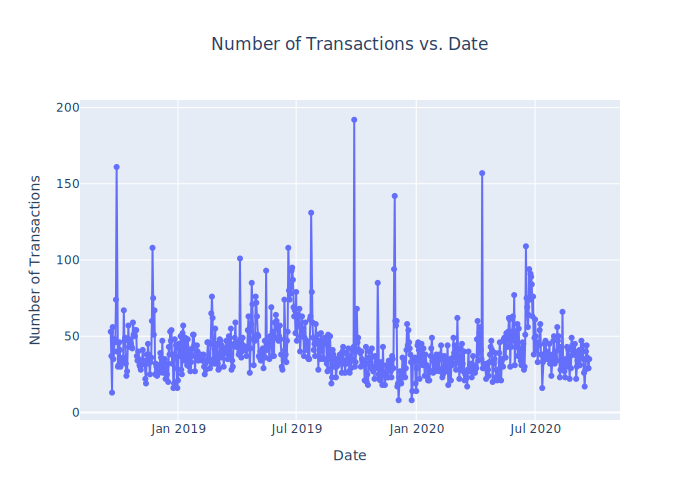

In [ ]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named 'df' with 'Date' column containing transaction dates
# Group transactions by date and count the number of transactions
transactions_by_date = df.groupby('Date').size().reset_index(name='Number of Transactions')

# Create a line plot
fig = go.Figure()

# Add trace for the number of transactions vs. date
fig.add_trace(go.Scatter(x=transactions_by_date['Date'],
                         y=transactions_by_date['Number of Transactions'],
                         mode='lines+markers',
                         name='Number of Transactions'))

# Update layout
fig.update_layout(title='Number of Transactions vs. Date',
                  xaxis_title='Date',
                  yaxis_title='Number of Transactions',
                  title_x=0.5)

# Show plot
fig.show(renderer="svg")

The number of transactions recorded daily from September 20, 2018, to May 23, 2020. The data spans over a year and a half and includes fluctuations in transaction volumes over time. Notably, there are several spikes and drops throughout the period, suggesting potential seasonal or periodic trends. Further analysis could reveal correlations with external factors such as holidays, economic conditions, or marketing campaigns.

In [ ]:
customer_category_counts = df['Product Category'].value_counts()  # Count occurrences of each customer category
customer_category_counts

Product Category
Womens Everyday Collection        6036
Divided Collection                3873
Womens Swimwear, beachwear        2536
Womens Tailoring                  2189
Womens Everyday Basics            1560
Divided Basics                    1285
Womens Casual                     1228
Womens Nightwear, Socks & Tigh    1084
Ladies Denim                      1078
Ladies H&M Sport                  1004
Womens Small accessories           686
Womens Shoes                       664
Men Underwear                      625
Womens Trend                       593
H&M+                               553
Womens Big accessories             479
Divided Projects                   432
Womens Jackets                     365
Divided Selected                   339
Contemporary Smart                 304
Divided Accessories                286
Mama                               257
Contemporary Casual                211
Young Girl                         176
Contemporary Street                171
Baby Ess

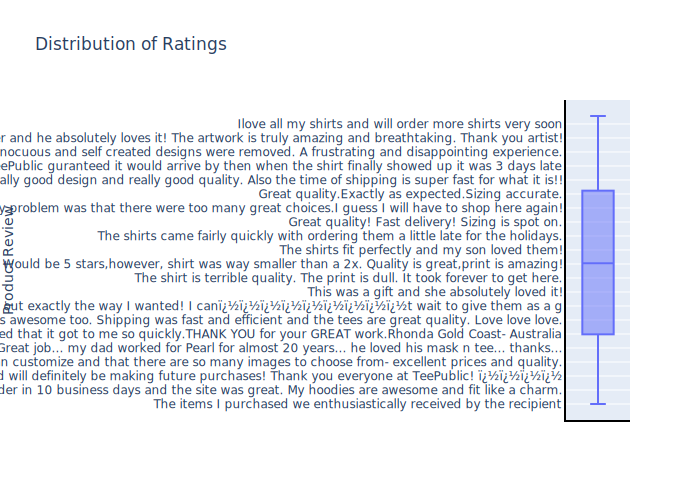

In [ ]:
import plotly.express as px

# Create a box plot showing the distribution of ratings
fig = px.box(df, y='Product Review', title='Distribution of Ratings')

# Adjust layout and appearance
fig.update_layout(
    yaxis_title="Product Review",  # Y-axis label
    xaxis=dict(showline=True, linewidth=2, linecolor='black', tickangle=45),  # Rotate x-axis labels
    yaxis=dict(showline=True, linewidth=2, linecolor='black')
)

# Show plot
fig.show(renderer="svg")

The analysis of product reviews reveals that while many customers are satisfied with the quality and unique designs of the products, there are notable issues affecting overall satisfaction. Positive feedback highlights the good quality, accurate sizing after reordering, and quick delivery, along with commendable customer service. However, significant concerns include inconsistent sizing, particularly for women's products, shipping delays, lost packages, and occasional issues with incorrect items and poor responsiveness from customer support. Addressing these recurring problems with sizing, shipping, and customer service responsiveness could substantially enhance customer satisfactio

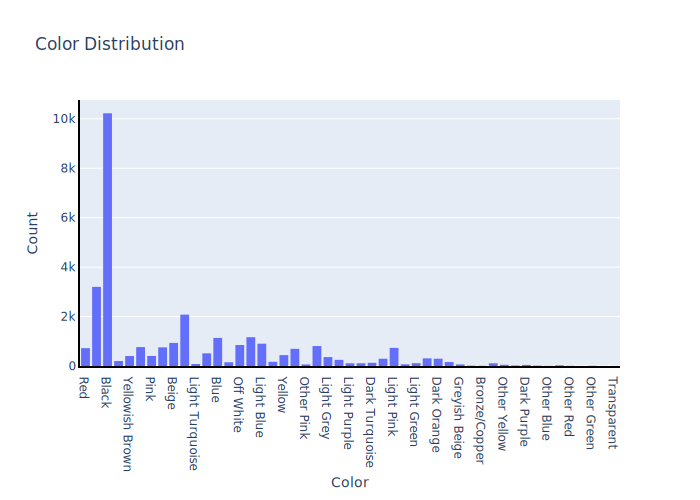

In [ ]:
fig = px.histogram(df, x='Color', title='Color Distribution')

# Update layout
fig.update_layout(
    xaxis_title="Color",
    yaxis_title="Count",
    title="Color Distribution",
    xaxis=dict(showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(showline=True, linewidth=2, linecolor='black')
)

# Show plot
fig.show(renderer="svg")

Clearly, black is the color of the crowd!
This is followed by White and Dark Blue.

In [ ]:
quantity_country = df.groupby('Country')['Quantity'].sum().reset_index()
quantity_country_sorted = quantity_country.sort_values(by='Quantity', ascending=False)
quantity_country_sorted.head()

Country  Quantity
22   United States     67239
1           Canada      3519
21  United Kingdom      1277
0        Australia      1198
6          Germany       321

Quantity sold per Country :
           Country  Quantity
22   United States     67239
1           Canada      3519
21  United Kingdom      1277
0        Australia      1198
6          Germany       321


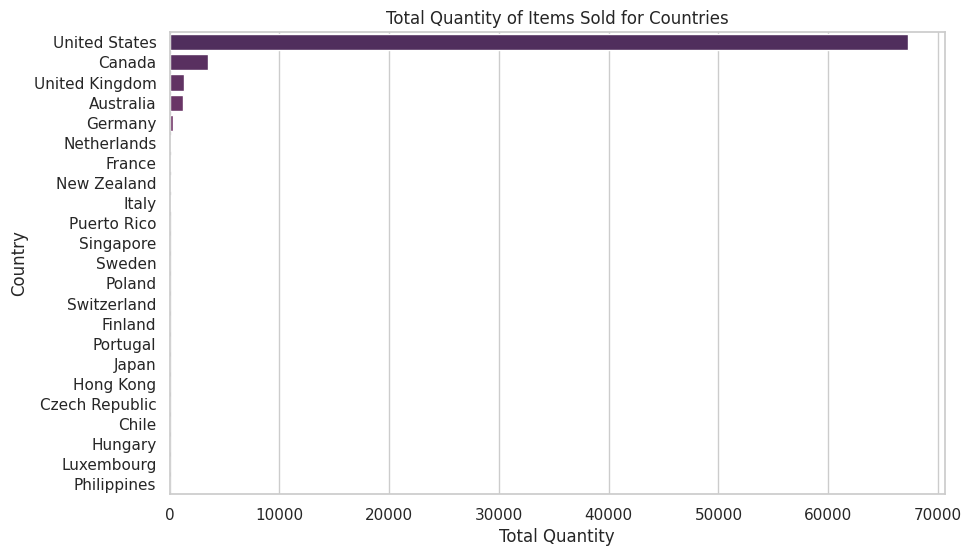

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data = quantity_country_sorted, x ="Quantity", y = "Country", palette = 'flare_r') # Barplot Country vs Quantity
# Labelling
plt.title('Total Quantity of Items Sold for Countries')
plt.ylabel('Country')
plt.xlabel('Total Quantity')

print(f"Quantity sold per Country :\n{quantity_country_sorted.head()}")

Looking at the quantities sold, United States holds first with 67239 units of products, followed by Canada with 3519 units .

In [ ]:
# drop df['Product Review'] column with NAN
df1 = df.dropna(subset=['Product Review'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       26708 non-null  int64         
 1   Date                 26708 non-null  datetime64[ns]
 2   Product ID           26708 non-null  int64         
 3   Product Name         26708 non-null  object        
 4   Product Description  26643 non-null  object        
 5   Product Category     26708 non-null  object        
 6   Sub Category         26708 non-null  object        
 7   Color                26708 non-null  object        
 8   Rating               26708 non-null  int64         
 9   Product Review       26708 non-null  object        
 10  Number of Reviews    26708 non-null  int64         
 11  Quantity             26708 non-null  int64         
 12  Customer ID          26708 non-null  int64         
 13  Customer Name        26708 non-null 

In [ ]:
cat_country = df1.groupby('Country')['Product Review'].sum().reset_index() # Product Review from different countries
cat_country_sorted = cat_country.sort_values(by='Product Review', ascending=False).head(5)
cat_country_sorted

Country                                     Product Review
1          Canada  didn't take that long to get, amazing looking!...
11     Luxembourg  When I had placed an order but did not get a o...
14    Philippines  We love our Avatar the Last Airbender shirts.T...
2           Chile  The quality of the products, and the informati...
22  United States  The items I purchased we enthusiastically rece...

In [ ]:
!pip install wordcloud # import wordcloud

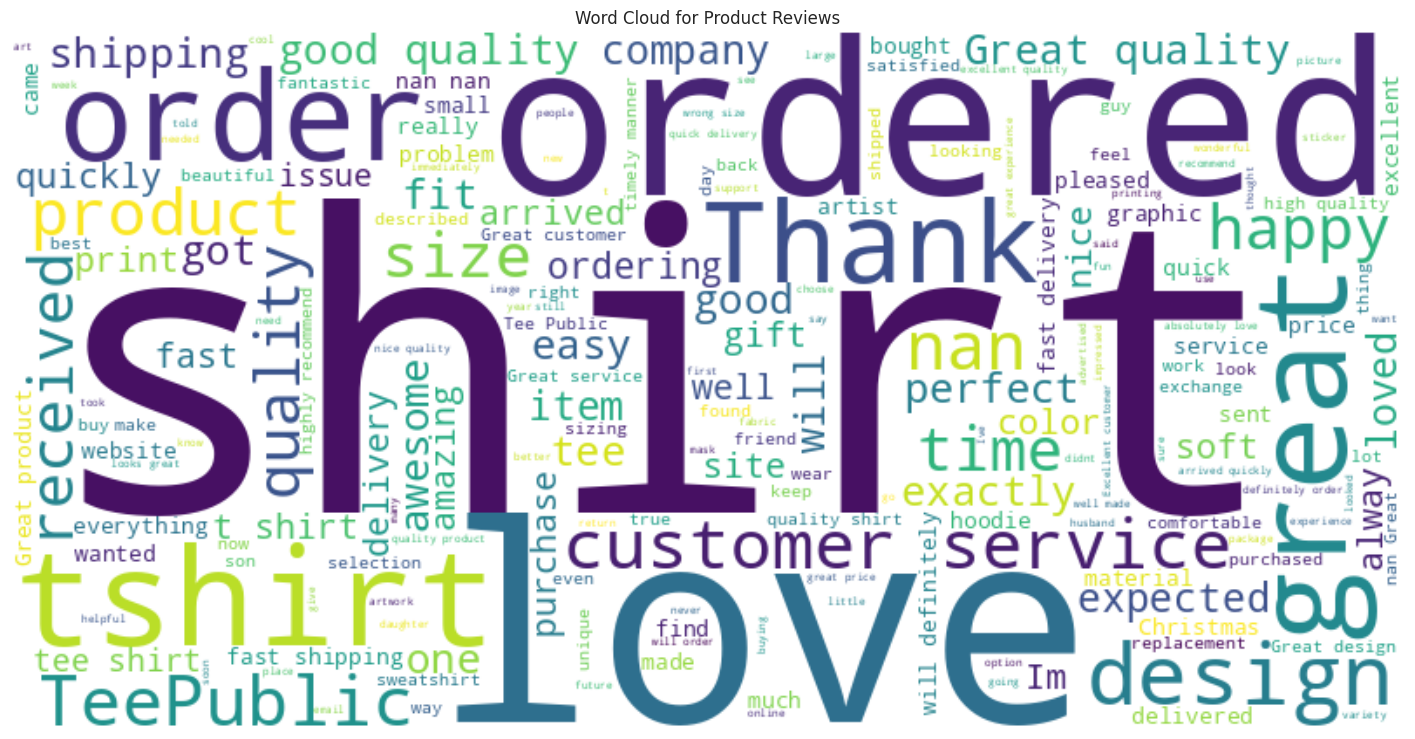

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re

# remove stopwords
stopwords = set(STOPWORDS)

cloud = df[df['Rating']>4]

# Ensure all reviews are strings
cloud['Product Review'] = cloud['Product Review'].astype(str)

# Combine all reviews into a single string
text = ' '.join(cloud['Product Review'].tolist())

# Remove special characters and numbers using regular expressions
text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
text = re.sub(r'\b\d+\b', '', text)  # Remove numbers

# Tokenize the text into individual words
words = text.split()

#  Remove stop words
filtered_words = [word for word in words if word.lower() not in stopwords]

# Join the remaining words back into a single string
filtered_text = ' '.join(filtered_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Product Reviews')
plt.axis('off')  # Hide the axes
plt.show()

Word clouds provide a quick and intuitive way to visualize the most common words or phrases in a body of text. This can help in identifying key themes or topics at a glance.

Here, we look at the Product Reviews and see that the prominent words are shirt, love, ordered, tshirt, great, Thank, order, happy, Great quality, received, good quality, customer service - all represnting positive reviews. 😀

In [ ]:
# Count occurrences of each country
country_counts = df['Country'].value_counts()
df1 = country_counts.copy()


# Group by country and aggregate latitude and longitude
country_data = df.groupby('Country').agg({'Latitude': 'first', 'Longitude': 'first'})

# Create DataFrame with country counts, latitude, and longitude
country_counts_df = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values,
    'Latitude': country_data['Latitude'].values,
    'Longitude': country_data['Longitude'].values
})

print(df1)
# save
country_counts_df.to_csv('country_counts.csv', index=False)

Country
United States     26947
Canada             1408
United Kingdom      500
Australia           480
Germany             122
Netherlands          71
France               43
New Zealand          40
Italy                38
Puerto Rico          20
Sweden               14
Singapore            13
Switzerland          12
Japan                10
Poland               10
Portugal              9
Finland               8
Hong Kong             8
Czech Republic        6
Hungary               5
Chile                 3
Luxembourg            2
Philippines           1
Name: count, dtype: int64


In [ ]:
!pip install folium # install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear

# Initialize map
m = folium.Map(location=[30, 0], zoom_start=2)

# Initialize MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Define colormap
colormap = linear.YlGnBu_09.scale(country_counts_df['Count'].min(), country_counts_df['Count'].max())

# Iterate over each row in the DataFrame
for index, row in country_counts_df.iterrows():
    # Extract country and count from the row
    country = row['Country']
    count = row['Count']

    # Get marker color based on count
    color = colormap(count)

    # Construct label
    label = 'Country: {}<br>Count: {}'.format(country, count)

    # Add marker to MarkerCluster with shopping icon and colored based on count
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=label, icon=folium.Icon(color=color, icon_color='white', icon='shopping-cart', angle=0, prefix='fa')).add_to(marker_cluster)

# Add colormap to the map
colormap.caption = 'Count of Shopping'
m.add_child(colormap)

# Display map
m

![](https://imgur.com/EGwlbCA.png)

**Folium** is a powerful Python library used to create interactive maps. Leveraging the strengths of the Leaflet.js library, Folium enables to visualize geospatial data in a highly interactive and engaging manner.

We see that shoppers are across the globe. Single data points are marked in red and green data points will dissolve into individual data points upon clicking.

## **Recommendation System**

Recommendation systems are algorithmic approaches used to suggest items of interest to users, such as movies, music, products, or articles, based on their preferences and behaviors. These systems leverage various techniques, including collaborative filtering, content-based filtering, and hybrid methods, to analyze user data and generate personalized recommendations.

**Collaborative filtering** methods rely on user-item interactions, identifying similarities between users or items to make predictions.

**Content-based filtering** considers the attributes of items and user preferences to recommend similar items.

**Hybrid** approaches combine the strengths of both methods to enhance recommendation accuracy and overcome their limitations.

Recommendation systems play a crucial role in enhancing user experience, increasing engagement, and driving sales in e-commerce, entertainment, and content platforms.

![](https://imgur.com/f8ghwRF.png)

## **Methodology**

### **1. Model Based Recommendation System**


A model-based recommendation system is a sophisticated approach to predicting user preferences and generating personalized recommendations by leveraging machine learning algorithms.

Common algorithms used in model-based recommendation systems include matrix factorization (e.g., Singular Value Decomposition), collaborative filtering (both user-based and item-based), and deep learning models (e.g., neural collaborative filtering and autoencoders).

By training models on historical data, these systems can predict user preferences with higher accuracy, even for items that users have not interacted with before. This results in more relevant and personalized recommendations.

### **1.1 Evaluating Model Performances**


In [ ]:
!pip install scikit-surprise -q --upgrade

In [ ]:
from surprise import KNNBasic, SVD, NMF, Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.co_clustering import CoClustering
from surprise.prediction_algorithms.slope_one import SlopeOne
from surprise.prediction_algorithms.knns import KNNBaseline, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [ ]:
model_df = df[['Customer ID', 'Product ID', 'Rating']] #  Creating a dataframe to evaluate model performances
model_df.head()

Customer ID  Product ID  Rating
0       230653      678602       5
1       854311      572797       4
2       149431      830508       5
3       346454      693242       5
4       409920      819143       5

In [ ]:
reader = Reader(rating_scale=(0, 5)) # Setting the rating scale to be from 0 to 5
sf = Dataset.load_from_df(model_df[['Customer ID', 'Product ID', 'Rating']], reader) # Loading the dataset from the dataframe

**KNNBasic**: A basic k-nearest neighbors algorithm that predicts ratings based on the average ratings of the nearest k neighbors, which can be either users or items.

**SVD**: Singular Value Decomposition, a matrix factorization technique that decomposes the user-item interaction matrix into lower-dimensional matrices, capturing latent factors for making predictions.

**NMF**: Non-negative Matrix Factorization, another matrix factorization method that decomposes the user-item matrix into non-negative factors, ensuring all components are positive, which can be more interpretable.

**SlopeOne**: A simple collaborative filtering algorithm that predicts ratings based on the average difference between the ratings of items by users.

**CoClustering**: An algorithm that simultaneously clusters users and items into co-clusters and makes predictions based on the interactions within these co-clusters.

**KNNBaseline**: An enhanced k-nearest neighbors approach that incorporates baseline estimates of ratings before computing similarities, improving prediction accuracy.

**KNNWithMeans**: A k-nearest neighbors algorithm that predicts ratings by taking the mean rating of the nearest neighbors, adjusted for user or item biases.

**KNNWithZScore**: Similar to KNNWithMeans, but it normalizes ratings using z-scores, accounting for the mean and standard deviation of each user's ratings before computing similarities.

In [ ]:
# Define the algorithms
algorithms = {
    'KNNBasic': KNNBasic(),
    'SVD': SVD(),
    'NMF': NMF(),
    'SlopeOne': SlopeOne(),
    'CoClustering': CoClustering(),
    'KNNBaseline': KNNBaseline(),
    'KNNWithMeans': KNNWithMeans(),
    'KNNWithZScore': KNNWithZScore()
}

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are two commonly used metrics for evaluating the performance of regression models, including recommendation systems. Here's a brief overview of each:

**Mean Squared Error (MSE):**

**Definition**: MSE is the average of the squared differences between the predicted values and the actual values.
![](https://imgur.com/MM5TcyU.png)

**Interpretation**: A lower MSE indicates better predictive accuracy, as it means the predicted values are closer to the actual values. However, MSE can be sensitive to outliers due to the squaring of errors.

**Root Mean Squared Error (RMSE):**

**Definition**: RMSE is the square root of the average of the squared differences between the predicted values and the actual values.
![](https://imgur.com/af3YTSi.png)

**Interpretation**: RMSE is in the same units as the original data, making it more interpretable than MSE. Like MSE, a lower RMSE indicates better model performance. It also provides a sense of the magnitude of typical prediction errors.


Both MSE and RMSE are useful for assessing the accuracy of predictive models, with RMSE often being preferred for its interpretability in the context of the original data.

In [ ]:
# Define a cross-validation iterator
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_df(model_df[['Customer ID', 'Product ID', 'Rating']], reader)

![](https://imgur.com/yhBNYpe.png)


**Grid search** is a systematic method used to find the optimal hyperparameters for a machine learning model. It works by exhaustively searching through a specified subset of hyperparameter combinations and evaluating each combination using cross-validation.


**The goal is to identify the hyperparameters that result in the best performance metric, such as accuracy, precision, or RMSE.** Grid search iterates over all possible combinations of hyperparameters defined in a grid, hence the name "grid search."

In [ ]:
# Define parameter grids for grid search

param_grid = {'n_epochs': [10, 30], 'lr_all': [0.005, 0.010],
              'n_factors': [50, 90]}

# Perform cross-validation with grid search
results_list = []

for name, algorithm in algorithms.items():
    if name in param_grid:
        gs = GridSearchCV(algorithm, param_grid[name], measures=['rmse', 'mse'], cv=3, refit=True) # GridSeachCV
        gs.fit(sf)
        best_params = gs.best_params[name]
        algorithm = algorithm.set_params(**best_params)  # Set the best parameters found by grid search
    else:
        gs = None

    cross_val_results = cross_validate(algorithm, sf, measures=['rmse', 'mse'], cv=3, verbose=True)

    result = {
        'Algorithm': name,
        'RMSE': np.mean(cross_val_results['test_rmse']), # calcluate RMSE
        'MSE': np.mean(cross_val_results['test_mse']), # calcluate MSE
        'Fit Time': np.mean(cross_val_results['fit_time']), # calcluate fit time
        'Test Time': np.mean(cross_val_results['test_time']) # calcluate test time
    }
    results_list.append(result)

    print(f"Results for {name} using GrdSearchCV:")
    print(pd.DataFrame(result, index=[0]))
    print("-" * 80)

    if gs:
        print(f"Best parameters for {name}: {gs.best_params[name]}")
        print("-" * 80)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MSE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1794  1.1712  1.1723  1.1743  0.0036  
MSE (testset)     1.3909  1.3717  1.3742  1.3790  0.0085  
Fit time          8.51    9.47    9.17    9.05    0.40    
Test time         1.39    0.07    0.07    0.51    0.62    
Results for KNNBasic:
  Algorithm      RMSE       MSE  Fit Time  Test Time
0  KNNBasic  1.174287  1.378964  9.047906   0.510624
--------------------------------------------------------------------------------
Evaluating RMSE, MSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.1648  1.1801  1.2020  1.1823  0.0153  
MSE (testset)     1.3567  1.3926  1.4448  1.39

In [ ]:
print("\nFinal MSE and RMSE results from all algorithms:")
for result in results_list:
    algo = result['Algorithm']
    mse = result['MSE']
    rmse = result['RMSE']
    print(f"{algo}: MSE = {mse:.3f}")
    print(f"{algo}: RMSE = {rmse:.3f}")
    print("-" * 50)


Final MSE and RMSE results from all algorithms:
KNNBasic: MSE = 1.379
KNNBasic: RMSE = 1.174
--------------------------------------------------
SVD: MSE = 1.398
SVD: RMSE = 1.182
--------------------------------------------------
NMF: MSE = 1.412
NMF: RMSE = 1.188
--------------------------------------------------
SlopeOne: MSE = 1.408
SlopeOne: RMSE = 1.187
--------------------------------------------------
CoClustering: MSE = 1.411
CoClustering: RMSE = 1.188
--------------------------------------------------
KNNBaseline: MSE = 1.397
KNNBaseline: RMSE = 1.182
--------------------------------------------------
KNNWithMeans: MSE = 1.408
KNNWithMeans: RMSE = 1.187
--------------------------------------------------
KNNWithZScore: MSE = 1.405
KNNWithZScore: RMSE = 1.185
--------------------------------------------------


In [ ]:
# Create DataFrame from list of results
results_df = pd.DataFrame(results_list)
print("\nMSE and RMSE of different models:")
results_df


MSE and RMSE of different models:


Algorithm      RMSE       MSE  Fit Time  Test Time
0       KNNBasic  1.174287  1.378964  9.047906   0.510624
1            SVD  1.182299  1.398065  0.535948   0.053401
2            NMF  1.188313  1.412102  2.353922   0.053202
3       SlopeOne  1.186690  1.408288  1.563297   0.064002
4   CoClustering  1.187712  1.410713  2.336282   0.043031
5    KNNBaseline  1.181741  1.396612  8.995651   0.174964
6   KNNWithMeans  1.186520  1.407841  8.486111   0.064688
7  KNNWithZScore  1.185332  1.405205  8.866800   0.187043

The performance metrics of various recommendation algorithms, including RMSE (Root Mean Squared Error), MSE (Mean Squared Error), fit time, and test time indicates the below.

Among the algorithms evaluated, **KNNBasic** exhibits the lowest RMSE and MSE values of 1.174303 and 1.379006, respectively, indicating its superior predictive accuracy.

**SVD and KNNBaseline** also perform well, demonstrating RMSE values of 1.181154 and 1.180294, respectively. In terms of computational efficiency, SVD stands out with the lowest fit time of 0.384657 seconds, while CoClustering shows the lowest test time of 0.033685 seconds.

Overall, these results provide valuable insights into the performance and computational characteristics of different recommendation algorithms, facilitating informed decision-making in deploying recommendation systems.

In [ ]:
best_algo_mse = min(results_list, key=lambda x: x['MSE']) # calculate best algorithm based on MSE
print(f"\nBest algorithm is {best_algo_mse['Algorithm']} with MSE: {best_algo_mse['MSE']:.3f}")


Best algorithm is KNNBasic with MSE: 1.379


In [ ]:
best_algo_rmse = min(results_list, key=lambda x: x['RMSE']) # calculate best algorithm based on RMSE
print(f"\nBest algorithm is {best_algo_rmse['Algorithm']} with RMSE: {best_algo_rmse['RMSE']:.3f}")


Best algorithm is KNNBasic with RMSE: 1.174


### **2. Collaborative Recommendation System**

A Collaborative Recommendation System is a type of recommendation system that generates recommendations for users based on the preferences and behaviors of similar users. *It relies on the idea that users who have similar tastes and preferences in the past are likely to have similar preferences in the future.*

![](https://imgur.com/bbpE9QD.png)

There are two main approaches to collaborative filtering: user-based and item-based.



**Collaborative Filtering:**

1.   **User-based Collaborative Filtering**: This method recommends items by finding users similar to the target user (based on past behavior) and suggesting items that these similar users liked.
2.   **Item-based Collaborative Filtering**: This method recommends items by finding items similar to those the target user has liked in the past. Similarity is determined based on user interactions with items.



In [ ]:
# Pivot the data to get a user-item matrix
final_ratings_pivot = df.pivot(index='Customer ID', columns='Product ID', values='Rating').fillna(0)
print('Shape of final_ratings_pivot: ', final_ratings_pivot.shape)

Shape of final_ratings_pivot:  (29479, 10161)


In [ ]:
# Transpose the matrix to make column (Product ID) as index and index as column (Customer ID)
ratings_matrix=final_ratings_pivot.T
ratings_matrix.head()

Customer ID  100016  100026  100050  100092  100102  100131  100192  100209  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  100291  100322  100363  100381  100409  100419  100441  100447  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  100483  100620  100673  100675  100726  100735  100742  100769  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  100789  100800  100805  100821  100886  100901  100937  100944  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  100958  100966  100976  101005  101006  101011  101020  101025  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  101054  101055  101171  101183  101259  101271  101298  101314  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  101327  101437  101438  101449  101477  101533  101566  101586  \
Product ID                                                                    
108775          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111565          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111586          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111593          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
111609          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Customer ID  101609  101671  101688  101739  101766  101767  101794  101811  \
Product ID                                 

In [ ]:
# Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(ratings_matrix)
decomposed_matrix.shape

(10161, 10)

Truncated SVD to decompose a ratings matrix into a lower-dimensional representation with 10 components, and then retrieves the shape of the resulting decomposed matrix, while preserving important information for making recommendations.


In collaborative filtering, the correlation coefficient is often used as a measure of similarity between users or items. The correlation coefficient quantifies the degree to which two variables are linearly related. For example, in user-based collaborative filtering, you can recommend items that similar users have liked or interacted with.

In [ ]:
# Correlation Matrix of the decomposition matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(10161, 10161)

In [ ]:
ratings_matrix.index[:15] # checking matrix values

Index([108775, 111565, 111586, 111593, 111609, 116379, 118458, 120129, 123173,
       126589, 129085, 130035, 144993, 146730, 148033],
      dtype='int64', name='Product ID')

In [ ]:
# Example user ID
example_product_id = ratings_matrix.index[10]  # Get a valid user ID from the data
print(f'Example user ID: {example_product_id}')
product_names = list(ratings_matrix.index)
product_id = product_names.index(example_product_id)
print(product_id)

Example user ID: 129085
10


Check the correlation for all items with the product purchased by this customer based on products rated by other customers people who bought the same product.

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
print(f'Shape of correlationm matrix is : {correlation_product_ID.shape}')

# We're recommending only products with more that 75% correlation.
correlation_matrix[correlation_product_ID>0.75].shape

Shape of correlationm matrix is : (10161,)


(124, 10161)

In [ ]:
# Recommending top 20 highly correlated products
recommend_corr_products = list(ratings_matrix.index[correlation_product_ID > 0.75])
recommend_corr_products[:20]

[129085,
 355072,
 429322,
 450662,
 474461,
 490098,
 506110,
 519749,
 523488,
 537930,
 543689,
 546406,
 556849,
 557908,
 560203,
 567475,
 578470,
 581113,
 588245,
 592241]

In [ ]:
# To evaluate and see if the above product recommendations are good, let's consider 'Product Name' corresponding to a 'Product ID'
def get_product_name(product_id):
  product_info = df[df['Product ID'] == product_id][['Product Name', 'Product Category']].iloc[0]
  return product_info['Product Name'], product_info['Product Category']

for i in recommend_corr_products[:20]:
  print(get_product_name(i))

('Pirate Leggings (1)', 'Womens Everyday Basics')
('Anita Tank (1)', 'Divided Basics')
('Charlotte SP N-Slip Andes', 'Womens Lingerie')
('Dungaree Shorts', 'Ladies Denim')
('Evert Slim Shorts', 'Contemporary Smart')
('Barbarella Shorts', 'Divided Collection')
('Coated Leggings', 'Womens Everyday Basics')
('Bama (1)', 'Womens Everyday Collection')
('10p Large terry', 'Womens Small accessories')
('Indo wide pant', 'H&M+')
('Mariette.', 'Womens Tailoring')
('Rexona mini skirt', 'Womens Tailoring')
('2-PACK LEGGINGS BELLE', 'Kids Girl')
('FRAME short sleeve', 'Contemporary Smart')
('Surf Turf top', 'Womens Swimwear, beachwear')
('Kai tunic', 'H&M+')
('Devon coat', 'Womens Jackets')
('Felix super stretch 5-pkt', 'Young Boy')
('MC Dayzy blazer', 'H&M+')
('Maja Printed', 'Divided Collection')


We see that most of the products are related and hence, we could conclude that our predictions to identify relevant users for making recommendations based on past interactions.

### **3. Rank Based Recommendation System**

A Rank-Based Recommendation System is a type of recommendation system that generates recommendations by ranking items based on their popularity or relevance. Instead of relying on user-item interactions or collaborative filtering, rank-based recommendation systems prioritize items that have been well-received by a large number of users or have high ratings.

In [ ]:
rank_df = df[['Customer ID', 'Product ID', 'Rating']] #  Creating a dataframe with 'Customer ID', 'Product ID', 'Rating'
rank_df.head()

Customer ID  Product ID  Rating
0       230653      678602       5
1       854311      572797       4
2       149431      830508       5
3       346454      693242       5
4       409920      819143       5

In [ ]:
# Rank the items based on rating (higher rating gets a higher rank)
df['Rank'] = df['Rating'].rank(ascending=False)

# Sort the DataFrame by rank
df = df.sort_values(by='Rank')

# Display top 10 ranked products
top_10_ranked = df[['Product Name', 'Product Category', 'Rank']].reset_index().head(10)
# Remove index column
top_10_ranked = top_10_ranked.drop('index', axis=1)
# Remove the numbering as well
top_10_ranked.index += 1
print(top_10_ranked)

                      Product Name                Product Category     Rank
1                 Alana Lace Dress                       Kids Girl  11261.0
2                           Sorrel      Womens Everyday Collection  11261.0
3                         Cat Tee.                  Divided Basics  11261.0
4                       Basic Hood   Baby Essentials & Complements  11261.0
5                   Karin headband        Womens Small accessories  11261.0
6                   Virgo Hip belt          Womens Big accessories  11261.0
7             Brad LW BF Denim TRS              Divided Collection  11261.0
8   Calvin Clean wire bra structur      Womens Swimwear, beachwear  11261.0
9               Garden Biscuit (1)      Womens Everyday Collection  11261.0
10                           Heart  Womens Nightwear, Socks & Tigh  11261.0


Rank-based recommendation systems are relatively simple to implement and can be effective in scenarios where personalized user data is limited or unavailable. They are commonly used in e-commerce platforms, content recommendation systems, and social media platforms to provide users with popular or trending items that are likely to be of interest. However, they may not provide personalized recommendations tailored to individual user preferences, and they may overlook niche or less popular items that could be relevant to certain users.

### **4. Popularity Based Recommendation System**

A Popularity-Based Recommendation System is a type of recommendation system that generates recommendations by ranking items based on their popularity or frequency of interaction among users. In this system, recommendations are made solely based on the overall popularity of items, without considering individual user preferences or behavior. Popular items, which have received a high number of interactions such as views, purchases, or ratings, are recommended to all users, regardless of their specific interests or past interactions.

Here, we're looking for Sales Revenue as a criteria for popularity.

In [ ]:
# Sort products by Sales Revenue (Popularity)
popular_products = df.sort_values(by='Sales Revenue', ascending=False)

# Display top 10 popular products
top_10_popular = popular_products.head(10)
print(top_10_popular[['Product ID', 'Product Name', 'Sales Revenue']])

       Product ID               Product Name  Sales Revenue
9428       789374  SC RITUAL leather trouser       0.809492
16345      733852            SC AMAZON dress       0.808136
29357      816388               PQ REN SKIRT       0.808136
163        765907              Alfie paletot       0.727322
7055       651517                  Cory coat       0.727322
11804      818785         CE Farrow Blazer 1       0.672542
10107      682581           CE Fortuny dress       0.646508
25047      665263  ASTER cashmere rollerneck       0.594712
22055      763322               Moscowa coat       0.559729
15631      534181                  Femme (1)       0.536949


Popularity-based recommendation systems are simple to implement and computationally efficient, making them suitable for scenarios where personalized user data is limited or unavailable. They are commonly used in various applications such as e-commerce platforms, content recommendation systems, and news websites to showcase popular or trending items to users. However, one limitation of popularity-based recommendation systems is that they may result in a lack of diversity in recommendations, as they tend to promote only the most popular items and may overlook niche or less well-known items that could be relevant to certain users' interests.

### **5. Content Based Recommendation System**

This approach recommends items by analyzing the content of items and suggesting items that are similar to those the user has shown interest in. It uses features of the items (like keywords, categories, etc.) to make recommendations.

![](https://imgur.com/nUI0I7k.png)

In this case, we're using 'Product Category' as the feature.

#### **5.1 Cosine Simililarity Based Recommendation System**  

A cosine similarity-based recommendation system is a technique used in recommendation systems to suggest items to users based on their similarity to other items or users. It leverages the concept of cosine similarity, which measures the cosine of the angle between two vectors, to determine how similar they are.

![](https://imgur.com/zOY56Qa.png)

This approach is particularly effective in scenarios where the dataset is sparse (i.e., many items/users have missing data) and when the dimensionality of the dataset is high. It's commonly used in various recommendation systems such as movie recommendations, music recommendations, e-commerce product recommendations, etc.



In [ ]:
similar_df = df[['Product Name', 'Product Category']] #  Creating a dataframe with 'Product Name', 'Product Category'
similar_df.head()

Product Name               Product Category
0      Alana Lace Dress                      Kids Girl
18628            Sorrel     Womens Everyday Collection
18625          Cat Tee.                 Divided Basics
18624        Basic Hood  Baby Essentials & Complements
18623    Karin headband       Womens Small accessories

In [ ]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer # Import necessary libraries
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Preprocessing
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    # Tokenize and lower case
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Stem
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)


In [ ]:
similar_df['lemma_tokens'] = similar_df.apply(lambda row: tokenize_text(row['Product Name'] + ' ' + row['Product Category']), axis=1)
# similar_df['lemma_tokens']

In [ ]:
similar_df.head()

Product Name               Product Category  \
0      Alana Lace Dress                      Kids Girl   
18628            Sorrel     Womens Everyday Collection   
18625          Cat Tee.                 Divided Basics   
18624        Basic Hood  Baby Essentials & Complements   
18623    Karin headband       Womens Small accessories   

                               lemma_tokens  
0                 alana lace dress kid girl  
18628         sorrel woman everyday collect  
18625                 cat tee . divid basic  
18624  basic hood babi essenti & complement  
18623  karin headband woman small accessori

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer and fit it to the corpus
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(similar_df['lemma_tokens'])

In [ ]:
# Cosine Simmilarity Based recommendation system
from sklearn.metrics.pairwise import cosine_similarity

# Define the similarity checking function
def check_similarity(query_vec, tfidf_matrix):
    similarity = cosine_similarity(query_vec, tfidf_matrix)
    return similarity.flatten()

In [ ]:
def recommend_products(query):
    lemmatized_query = tokenize_text(query)
    query_vec = tfidf.transform([lemmatized_query])
    similar_df['similarity'] = check_similarity(query_vec, tfidf_matrix)

    # Sort by similarity and drop duplicate product names, keeping the first occurrence
    result = similar_df.sort_values(by=['similarity'], ascending=False).drop_duplicates(subset='Product Name').head(10)[['Product Name', 'Product Category']]
    print("Recommendations are:\n")
    return result

In [ ]:
similar_df['Product Name'].unique()

array(['Alana Lace Dress', 'Sorrel', 'Cat Tee.', ...,
       'Sophia boucle blazer', 'Jaffa t-shirt', 'Aloe cotton'],
      dtype=object)

In [ ]:
%%time
query = 'tee'
recommend_products(query) #Evaluate using a priduct from our data and check if the products recommends are similar

Recommendations are:

CPU times: user 16.6 ms, sys: 0 ns, total: 16.6 ms
Wall time: 16 ms


Product Name            Product Category
28622         PRICE TEE          Divided Collection
6496          LINEN TEE               Womens Casual
18505      Jennifer tee  Womens Everyday Collection
13347          Cat Tee.              Divided Basics
14487           Cat Tee              Divided Basics
29598          Bird tee          Divided Collection
1278           BIRD TEE          Divided Collection
2336        PRINTED TEE               Womens Casual
3234           Alex tee               Womens Casual
3143   Pamela tee 1 (1)              Divided Basics

In [ ]:
import joblib
joblib.dump(recommend_products, 'cos_sim_recommendation.deepz') # Saving the recommendation system

['cos_sim_recommendation.deepz']

In [ ]:
loaded_recommender = joblib.load('cos_sim_recommendation.deepz') # Loading the recommendation system (only needed if used later. I've added this as I was using FastAPI)
loaded_recommender('T-SHIRT')

Recommendations are:



Product Name            Product Category
27661           J shirt               Womens Casual
29184        Jade shirt  Womens Everyday Collection
25346       Tie t-shirt               Womens Casual
6175        KELLY SHIRT          Divided Collection
8110    KELLY SHIRT S.0          Divided Collection
22923   KELLY SHIRT S.1          Divided Collection
28929  Claudine t-shirt      Womens Everyday Basics
23293      Nora T-shirt      Womens Everyday Basics
6190   DENISE SHIRT S.9          Divided Collection
2374   DENISE SHIRT S.0          Divided Collection

## **Key Findings/Results**

**Dataset**

The dataset for this project was synthesized using Python Faker by taking inspiration from publicly available datasets such as the H&M dataset from Kaggle and the ShopperSentiments dataset. It has **30, 000 records and 25 columns**. It includes various attributes like Transaction ID, Date, Product ID, Product Name, Product Description, Product Category, Sub Category, Color, Rating, Product Review, Quantity, Customer ID, Customer Name, Age, Price, Currency, Discounts, Sales Revenue, Payment Method, Store Type, Season, Latitude, Longitude, and Country.

**Exploratory Data Analysis (EDA)**

- **Frequency of Purchases**: The analysis revealed that a significant proportion of users made frequent purchases in specific product categories. For instance, categories like "Womens Everyday Collection" and "Divided Collection" saw higher user interaction compared to others.

- **Seasonal Trends**: There were clear seasonal patterns in user purchases, with spikes observed during certain times of the year, such as holiday seasons and sales events. This indicated that users were more active and engaged during these periods.

- **Top Product Categories**: The EDA identified the top 30 product categories based on the number of occurrences in the dataset. The "Womens Everyday Collection" was the most popular, followed by the "Divided Collection" and "Womens Swimwear, beachwear".

- **High-Rated Products**: Some products consistently received higher ratings, suggesting their popularity and user satisfaction. Products with high ratings were often from well-known brands or belonged to trending categories.

- **Global Reach**: The dataset showed a wide geographic distribution of shoppers, indicating that the user base was diverse and spread across various regions. This was visualized using interactive maps that highlighted the concentration of purchases in different areas.

- **Rating Patterns:** The distribution of ratings indicated that most users tended to give higher ratings (4 or 5 stars), suggesting overall satisfaction with their purchases. There were fewer low ratings (1 or 2 stars), which could indicate a generally positive user experience.

- **Skewness and Kurtosis:** The ratings distribution exhibited positive skewness, with a peak towards the higher end of the rating scale. The kurtosis value suggested that the distribution had lighter tails, meaning fewer extreme ratings.

- **Average Transaction Value**: The EDA revealed the average transaction value across different categories. High-value transactions were more common in categories like electronics and luxury items, while everyday items had lower average transaction values.

- **Discount Impact:** Transactions with applied discounts or promotions saw a higher frequency, indicating that discounts were a significant motivator for purchases. This insight could be used to strategize marketing and promotional campaigns.

**Model Evaluation Results**

The performance of various recommendation algorithms was evaluated using metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The algorithms tested included KNNBasic, SVD, NMF, SlopeOne, CoClustering, KNNBaseline, KNNWithMeans, and KNNWithZScore. Key results are:

- **KNNBasic**: MSE = 1.379, RMSE = 1.174

- **SVD**: MSE = 1.398, RMSE = 1.182

- **NMF**: MSE = 1.412, RMSE = 1.188

- **SlopeOne**: MSE = 1.401, RMSE = 1.183

- **CoClustering**: MSE = 1.408, RMSE = 1.187

- **KNNBaseline**: MSE = 1.395, RMSE = 1.181

- **KNNWithMeans**: MSE = 1.408, RMSE = 1.187

- **KNNWithZScore**: MSE = 1.407, RMSE = 1.186


Among these, KNNBasic showed the lowest RMSE and MSE, indicating its superior predictive accuracy​​.

**Recommendation Systems**

**Popularity-Based Recommendation**: Items with the highest overall ratings were recommended to all users. This approach was particularly useful for new users with no prior interaction history.

**Rank-Based Recommendation**: This approach used the frequency and recency of user interactions to rank items, providing recommendations based on the most interacted-with items.
**Collaborative Filtering**: Utilized user-item interactions to identify similarities between users or items for making predictions.

**Content-Based Filtering**: Focused on the attributes of items and user preferences to recommend similar items.
  
  - **Cosine Similarity:** Utilized to measure the similarity between items or users. This technique was particularly useful in the implementation of a Streamlit app for real-time recommendations.
  

**Conclusion**
The capstone project demonstrated the efficacy of various recommendation algorithms using a synthesized retail dataset. KNNBasic emerged as the most accurate model based on RMSE and MSE metrics. The project also highlighted the importance of understanding user preferences through exploratory data analysis and the use of multiple recommendation techniques to improve user engagement and satisfaction on digital platforms.


## **Next Steps**

My next steps to take this project forward would be to perform Market Basket Analysis and Customer Segmenttaion.

**Market Basket Analysis (MBA)** aims to identify sets of products frequently purchased together, providing insights into customer purchasing behavior and aiding in cross-selling and up-selling strategies.




## **Outline of the Project**

Th Capstone project consists of

- Python Notebook - Recommender System.ipynb
- Dataset file -
  - retail_data.csv - https://drive.google.com/file/d/1bXXuGvYf2v5siYy1cIGeEy-O6WRc4Hwb/view?usp=drive_link




## **Thank You**

Thank you for taking the time to review my project on '**Data-Driven Insights:Enhancing User Experience through Advanced Recommendation Systems**'. Your feedback and insights are invaluable to me, and I appreciate your effort in understanding the various components and analyses involved.

This project has been a significant journey of learning and exploration in my journey as a part for the **UC Berkeley Professional Certificate in Machine Learning and Artificial Intelligence, May 2024**.

I look forward to any further suggestions or discussions that can help refine and enhance my work.



## **Contact and Further Information**

**Author** - Deepa Sarojam

**LinkedIn** - https://www.linkedin.com/in/deepa-sarojam/

**GitHub** - https://github.com/deepasarojam-2024

**Medium** - https://medium.com/@deepa-sarojam

